# **EDA - Bank Marketing**

#### **Soure:** Dataset from https://archive.ics.uci.edu/dataset/222/bank+marketing

## **Importing libraries**

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter

/Users/fuenganh/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
import warnings
warnings.filterwarnings('ignore')

## **Dataset view**

In [7]:
df = pd.read_csv("/Users/fuenganh/Desktop/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **Dataset information**

Checking for missing values, data types and some other stuff:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<u>_Comment:_</u>  
- There are no missing values

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## **Exploratory Data Analysis**

### **1. Distribution of the Target**

In [10]:
def plot_distribution(data, column, ax):
    colors = ['white', '#a4a4a4']

    # Pie chart
    labels = data[column].value_counts().index
    vals = data[column].value_counts().values

    ax[0].pie(vals,
              explode=[0, 0.2],
              labels=labels,
              colors=colors,
              autopct='%.2f%%',
              shadow=False,
              wedgeprops=dict(edgecolor='black'))

    # Chỉnh lại size của annotate
    for text in ax[0].texts:
        text.set_fontsize(10)

    ax[0].set_ylabel('')

    # Countplot
    bars = ax[1].bar(labels,
                    vals,
                    color=colors,
                    edgecolor='black',
                    width=0.6)

    ax[1].set_xticks([0.00, 1.00])
    ax[1].set_yticks([])  # Xoá ytick
    ax[1].spines[['right', 'left', 'top']].set_visible(False)  # Xoá spine bên phải
    ax[1].grid(False)

    for bar in bars:
        count = bar.get_height()
        formatted_count = '{:,.0f}'.format(count)
        ax[1].annotate(f'{formatted_count}',
                       xy=(bar.get_x() + bar.get_width() / 2, count),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=10, color='black')

    # Chỉnh size của xtick
    ax[0].tick_params(axis='x', labelsize=14)
    ax[1].tick_params(axis='x', labelsize=10)

    # Chỉnh khoảng cách giữa 2 ax
    plt.subplots_adjust(wspace=0.2)

    # Show the plot
    plt.suptitle(f'The Distribution of Target Value', fontsize=14, color='black')

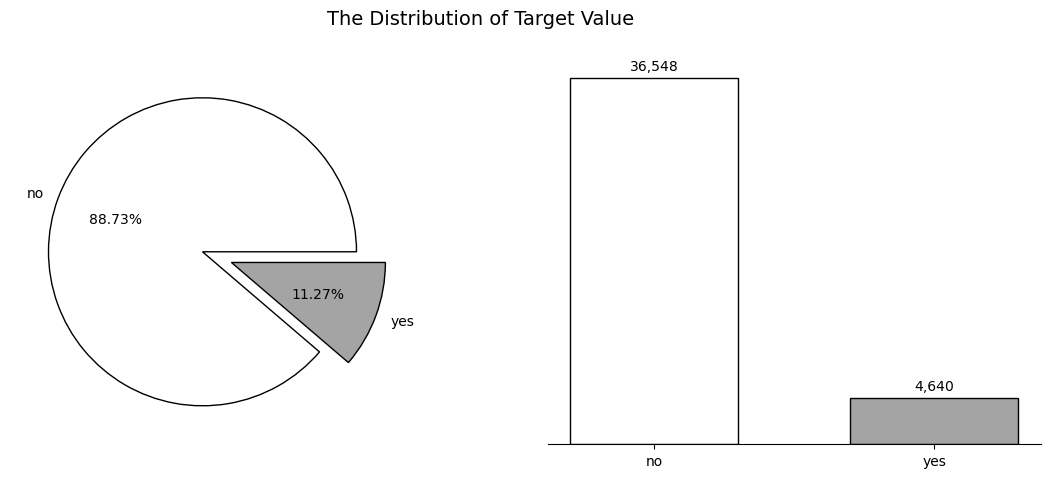

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
plot_distribution(df, 'y', ax)
plt.show()

<u>_Comment:_</u>  
- Obviously, the dataset is imbalanced.

Let's make the `y` binary right on this step

In [12]:
df['y'].replace({'no': 0, 'yes': 1}, inplace=True)

In [13]:
df['y'].tail(10)

41178    1
41179    0
41180    0
41181    1
41182    0
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, dtype: int64

In [14]:
df['previous'].value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

### **2. Correlation matrix**

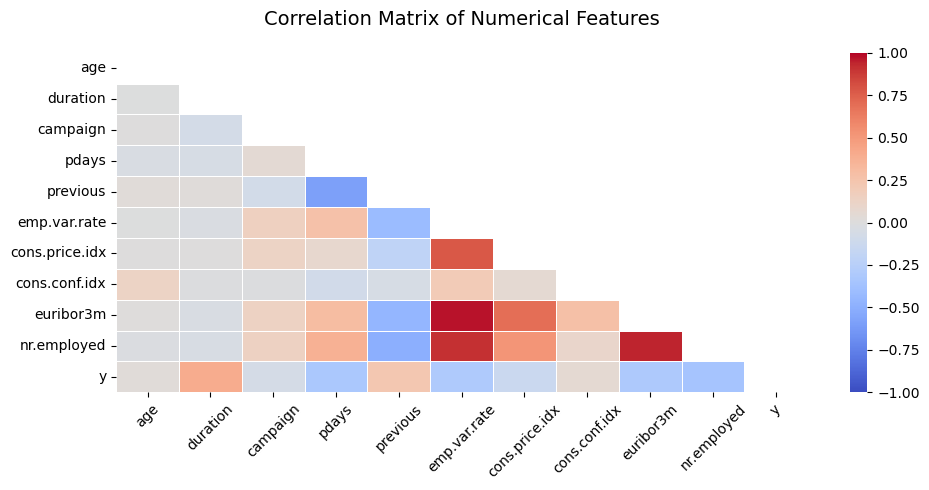

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

df_corr = df.select_dtypes(include=['int', 'float']).corr(method='pearson')

mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=df_corr, vmin=-1, vmax=1, mask=mask, 
            cmap=sns.color_palette('coolwarm', as_cmap=True),
            annot=True, fmt='.2f', linewidths=.5, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.title('Correlation Matrix of Numerical Features', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


<u>_Comment:_</u>  
- Numeric features which are the most correlated with `y` are:

        - duration: 0.41
        - pdays: 0.32
        - nr.employed: -0.35
        - euribor3m: -0.31
        - emp.var.rate: -0.30

### **3. Feature analysis**

The feature analysis will generally follow the sequence outlined in the Attribute Information section. Nonetheless, as a special consideration, the analysis will first focus on the `month` feature.

#### 3.1. `month` feature (categorical)

- Last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

In [16]:
def plot_categorical_distribution_with_target(df, feature_name, target_name='y', positive_class='1'):
    
    #group theo feature để lấy số lượng
    feature_counts = df[feature_name].value_counts().sort_index()
    
    #evaluate tỷ lệ positive class
    feature_props = df.groupby(feature_name)[target_name].apply(
        lambda x: (x.astype(str) == str(positive_class)).mean()
    ).sort_index()

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

    #unique value của cột feature
    sns.barplot(x=feature_counts.index, y=feature_counts.values, ax=ax1, palette="pastel")
    ax1.set_ylabel('Count', fontsize=12)
    ax1.set_xlabel('')
    ax1.set_title(f"'{feature_name}' distribution", fontsize=16, weight='bold')
    ax1.bar_label(ax1.containers[0], labels=[f"{v} ({v*100/feature_counts.sum():.0f}%)" for v in feature_counts.values], fontsize=9)
    ax1.tick_params(axis='x', rotation=45)

    # tỷ lệ YES của từng unique value trong dataset
    sns.barplot(x=feature_props.index, y=feature_props.values, ax=ax2, palette="coolwarm")
    ax2.set_ylabel('Proportion (%)', fontsize=12)  
    ax2.set_xlabel(feature_name, fontsize=12)
    ax2.bar_label(
        ax2.containers[0],
        labels=[f"{v*100:.1f}%" for v in feature_props.values],  
        fontsize=9
    )
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

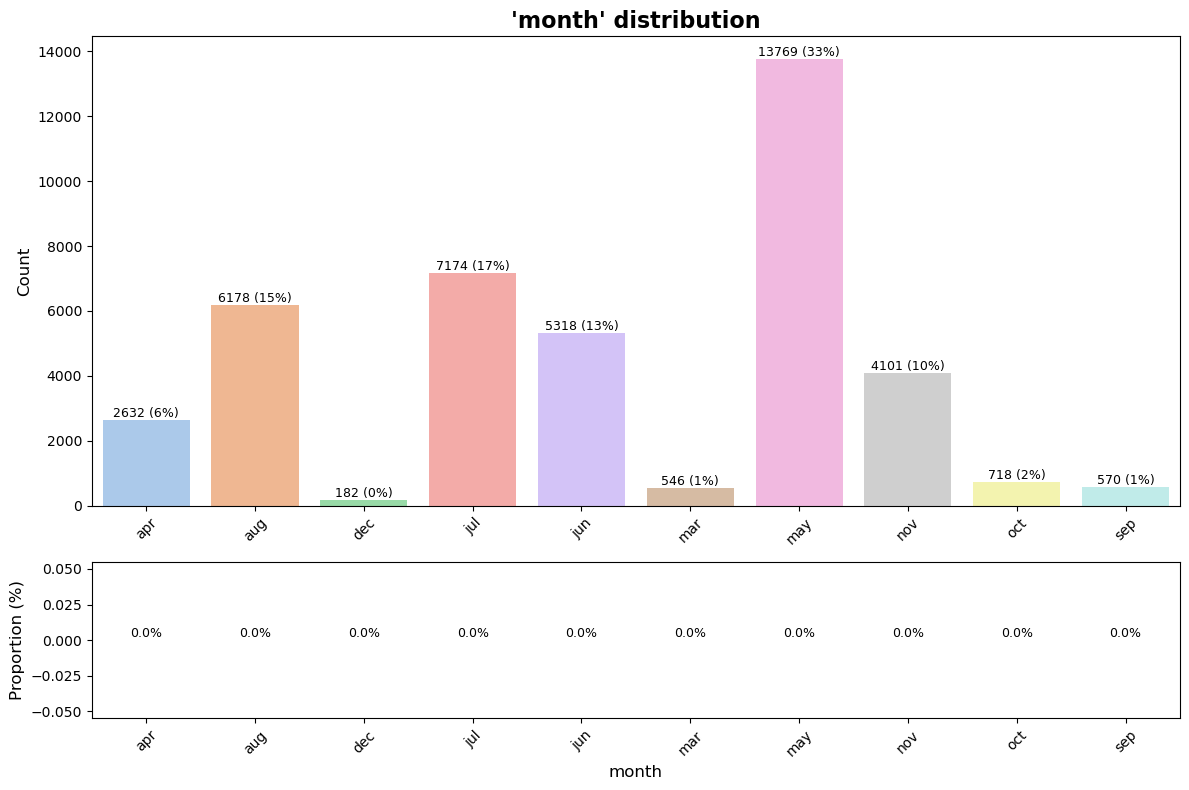

In [17]:
plot_categorical_distribution_with_target(df, feature_name='month', target_name='y', positive_class='no')

From the dataset description we know, that:
> `bank-additional-full.csv` with all examples (41188) and 20 inputs, **ordered by date (from May 2008 to November 2010)**, very close to the data analyzed in [Moro et al., 2014]

Given that the dataset focuses on individuals' consent to subscribe to a term deposit, it is reasonable to assume that each month reflects its own specific social and economic conditions. These factors undoubtedly could have influenced people's decisions, thereby affecting the target variable y.

To explore this temporal dimension further, I decided to introduce a new feature named year, derived from the date information. This addition aims to provide more insight into how different time periods may have impacted the subscription behavior.

**Note:** The year feature will be used solely for exploratory analysis purposes and will not be included in the model training process, in order to maintain the integrity and generalizability of the predictive model.

In [18]:
# Just a remainder: the observations are ordered by date (from May 2008 to November 2010)
months_arr = []
for i in range(df.shape[0]):
    
    if months_arr != [] and months_arr[-1][1] == df.iloc[i]['month']:
        continue
    else:
        months_arr.append([i, df.iloc[i]['month']])

months_arr = np.array(months_arr)
months_arr

array([['0', 'may'],
       ['7763', 'jun'],
       ['12137', 'jul'],
       ['18822', 'aug'],
       ['23997', 'oct'],
       ['24064', 'nov'],
       ['27680', 'dec'],
       ['27690', 'mar'],
       ['27972', 'apr'],
       ['30430', 'may'],
       ['36224', 'jun'],
       ['36939', 'jul'],
       ['37117', 'aug'],
       ['37887', 'sep'],
       ['38154', 'oct'],
       ['38601', 'nov'],
       ['38958', 'dec'],
       ['39130', 'mar'],
       ['39394', 'apr'],
       ['39568', 'may'],
       ['39780', 'jun'],
       ['40009', 'jul'],
       ['40320', 'aug'],
       ['40553', 'sep'],
       ['40856', 'oct'],
       ['41060', 'nov']], dtype='<U21')

|Year|Range|
|-|-|
|2008|[0 - 27 690)|
|2009|[27 690 - 39 130)|
|2010|[39 130 - 41 188)|

**Explaination:** The dataset `bank-additional-full.csv` is chronologically `ordered from May 2008 to November 2010`, as specified in its description. Each observation corresponds to a specific month, and since the data hasn't been shuffled, we can identify the transition points between months by monitoring changes in the `month` column.

Let's hardcode the `year` feature based on these indexes:

In [19]:
df['year'] = np.hstack((np.array([2008] * (27690 - 0)),
                        np.array([2009] * (39130 - 27690)),
                        np.array([2010] * (41188 - 39130))))

And a bit of reordering (I want to move the year right after the month):


In [20]:
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
         'contact', 'month', 'year', 'day_of_week', 'duration', 'campaign', 'pdays',
         'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
         'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]
df.head()

,age,job,marital,education,default,housing,loan,contact,month,year,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,2008,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,2008,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,2008,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,2008,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,2008,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [21]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [22]:
months = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
months_order = pd.Categorical(months, ordered=True)

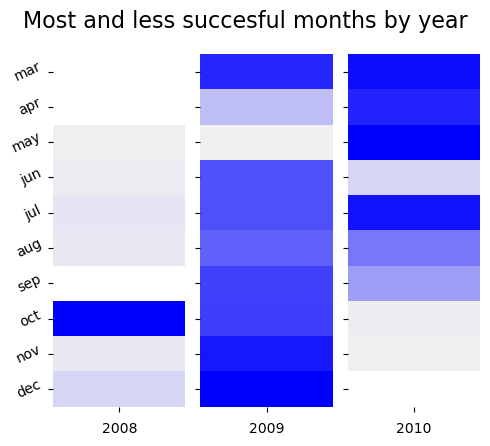

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(5, 4.5), sharey=True)

for i, year in enumerate(df['year'].unique()):
    sns.heatmap(pd.DataFrame(df[df['year'] == year].groupby('month')['y'].sum() / 
                             df[df['year'] == year].groupby('month')['y'].count()).reindex(months_order),
                cbar=False,
                cmap=sns.color_palette('light:b', as_cmap=True),
                ax=axes[i])
    axes[i].set_ylabel('')
    axes[i].set_xlabel(year)
    axes[i].set_xticklabels('')
    
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=25)

plt.suptitle('Most and less succesful months by year', fontsize=16)
plt.tight_layout();

Let's analyse months with taking years into account:

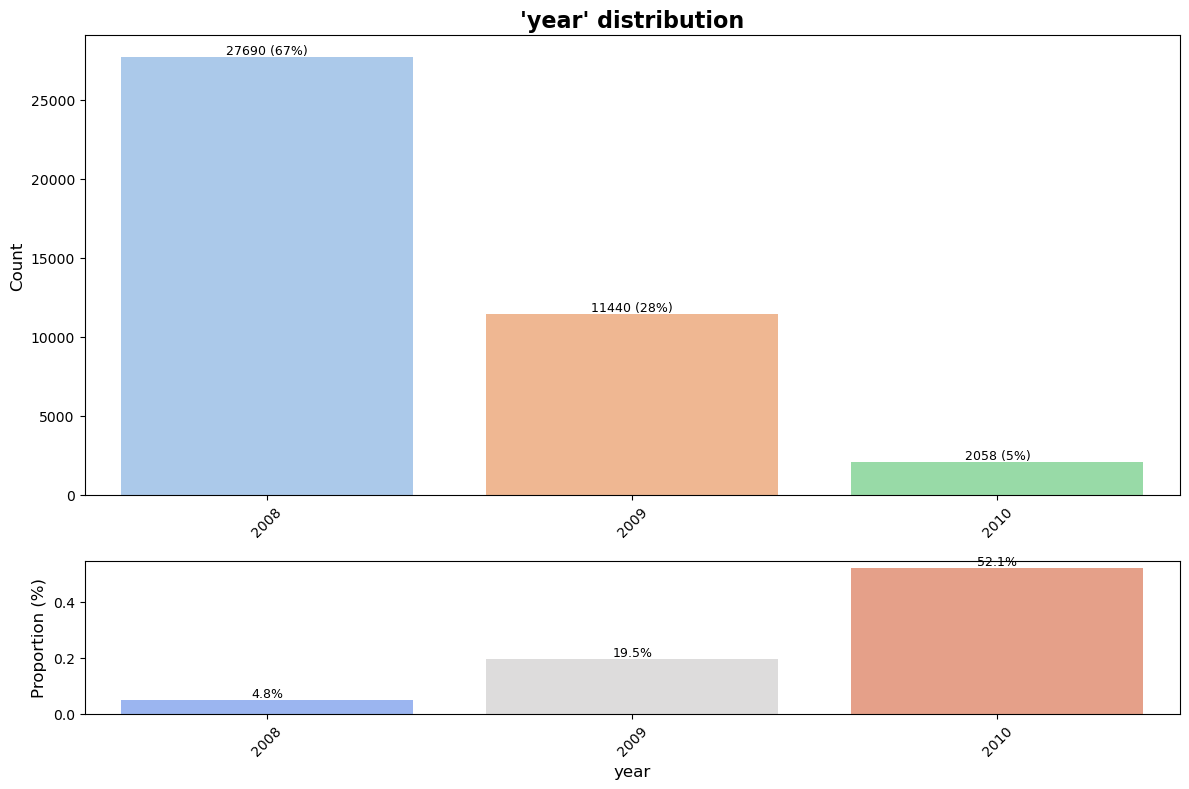

In [24]:
plot_categorical_distribution_with_target(df, 'year', 'y')

- The distribution across years is imbalanced
- Most observations were got in 2008 (~67%)
- The most successful year wá 2010 (YES-proportion ~ 52%)

In [25]:
df_2008 = df[df['year'] == 2008]

In [26]:
numeric_cols = df_2008.select_dtypes(include=['int16', 'int32', 'int64', 
                                              'float16', 'float32', 'float64']).columns

numeric_cols = numeric_cols[numeric_cols != 'year']

categorical_cols = df_2008.select_dtypes(include=['object']).columns

In [27]:
df_2008_median = df_2008.select_dtypes(include=['number']).groupby(df_2008['month']).median().reindex(index=months_order)

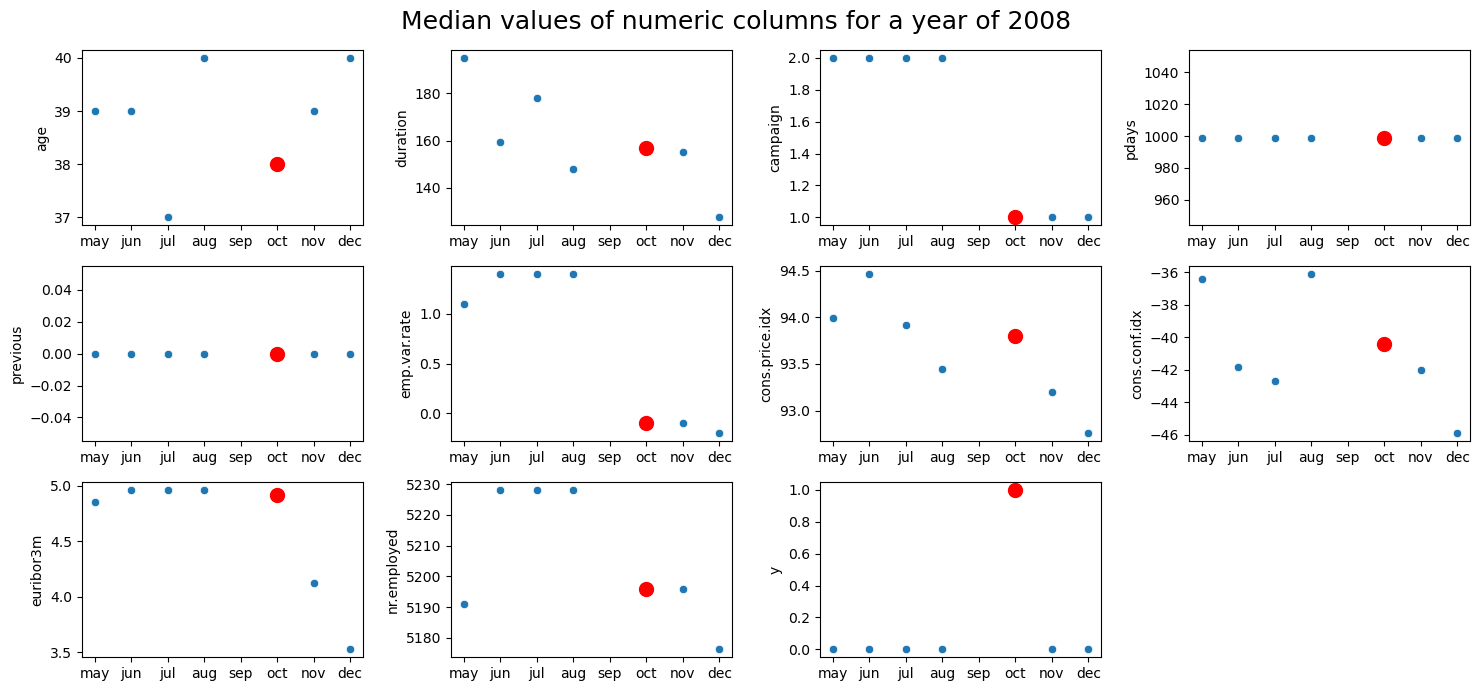

In [28]:
print()

fig, axes = plt.subplots(3, 4, figsize=(15, 7))
axes = axes.flatten()

for ax_, col in zip(axes[:-1], numeric_cols):
    sns.scatterplot(data=df_2008_median, 
                    x=months, 
                    y=col, 
                    ax=ax_)
    ax_.set_xlabel('')
    ax_.plot('oct', df_2008_median.loc['oct'][col], 'o', ms=10, c='r')

fig.delaxes(axes[-1])
plt.suptitle('Median values of numeric columns for a year of 2008', fontsize=18)
plt.tight_layout();

                      Distributions of categorical columns for a year of 2008                       


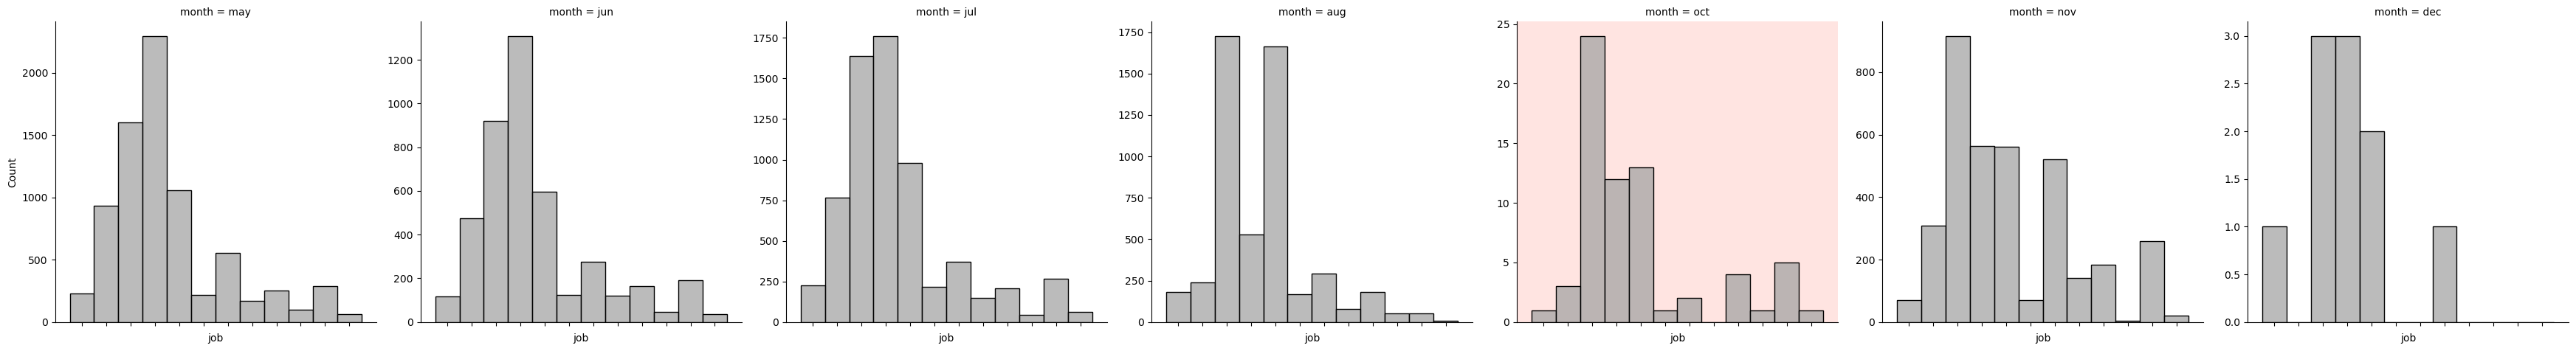

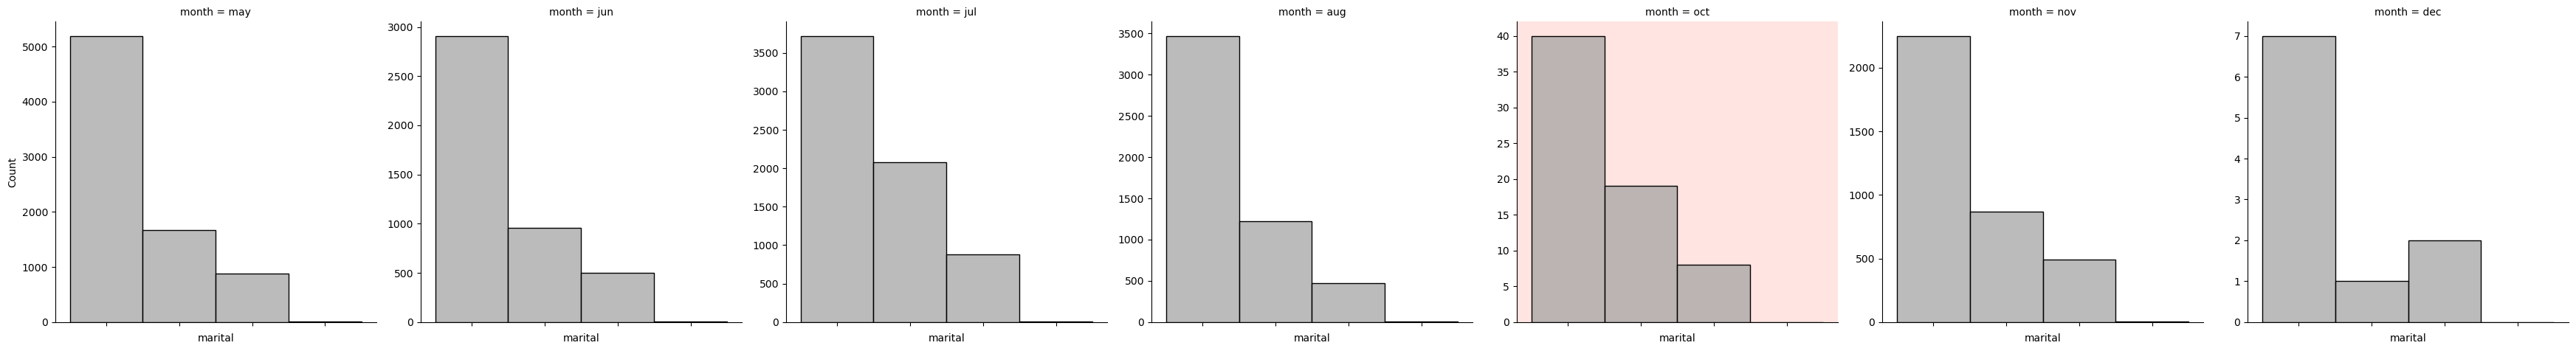

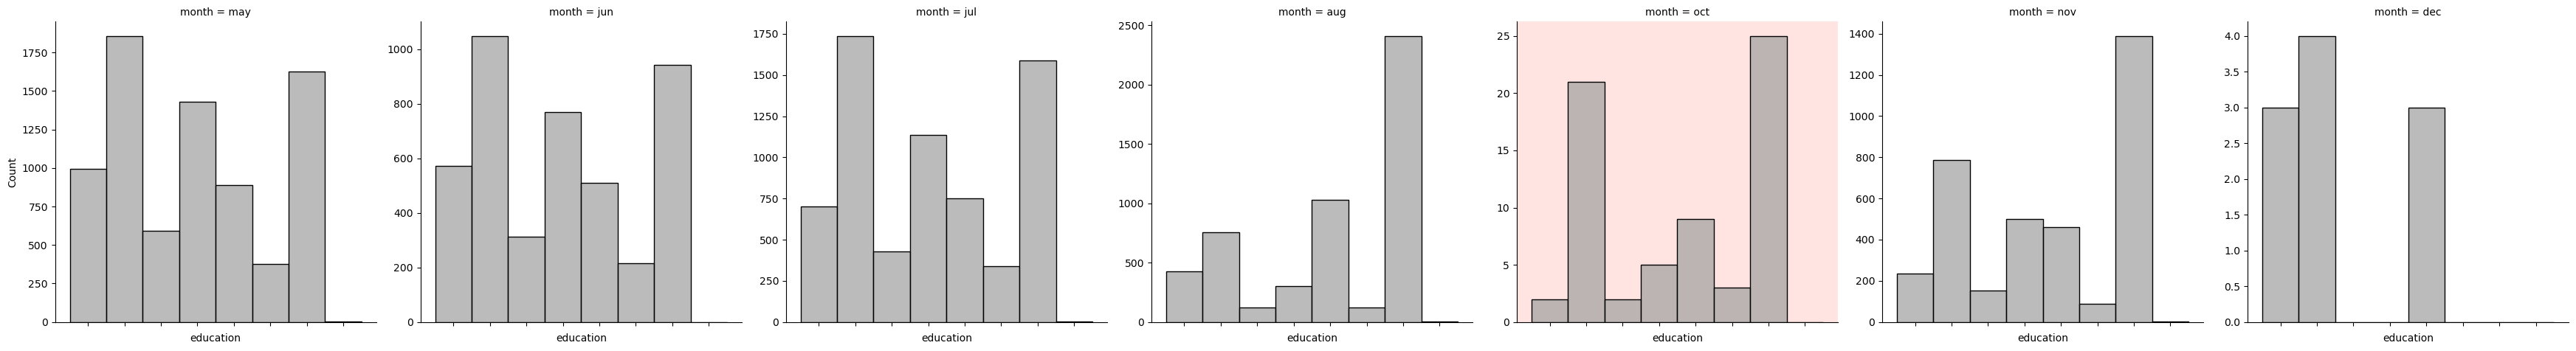

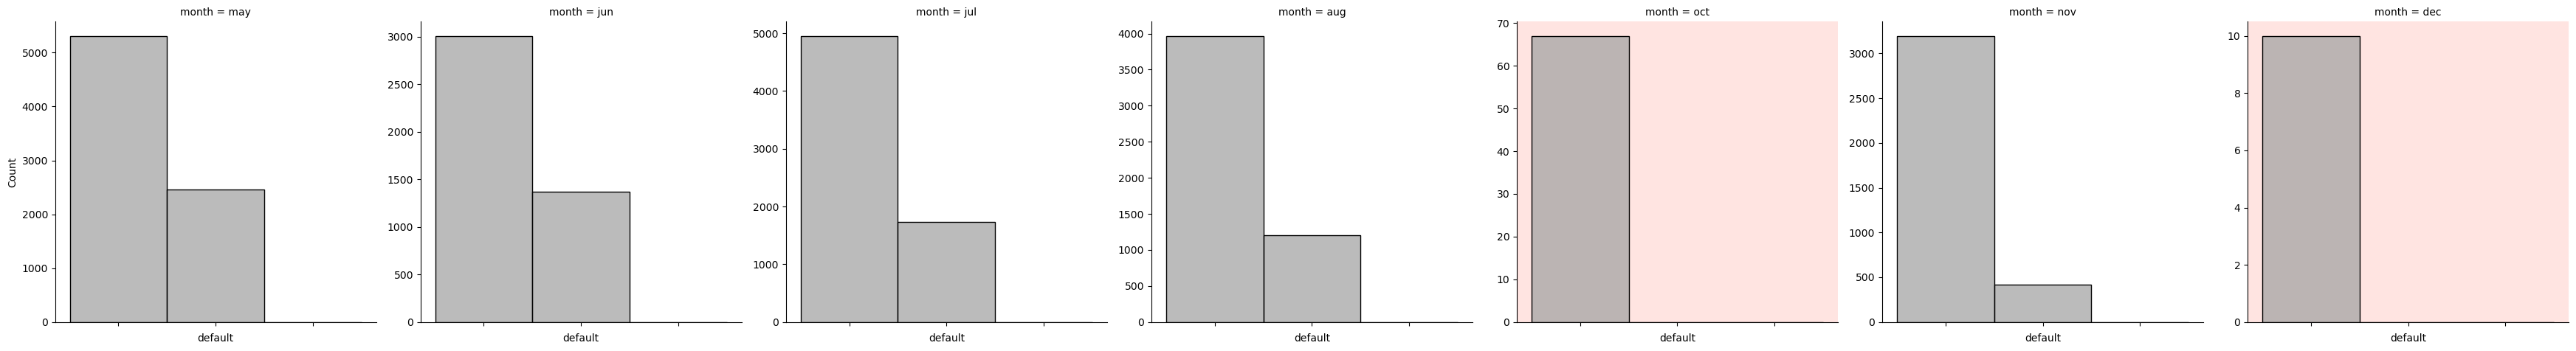

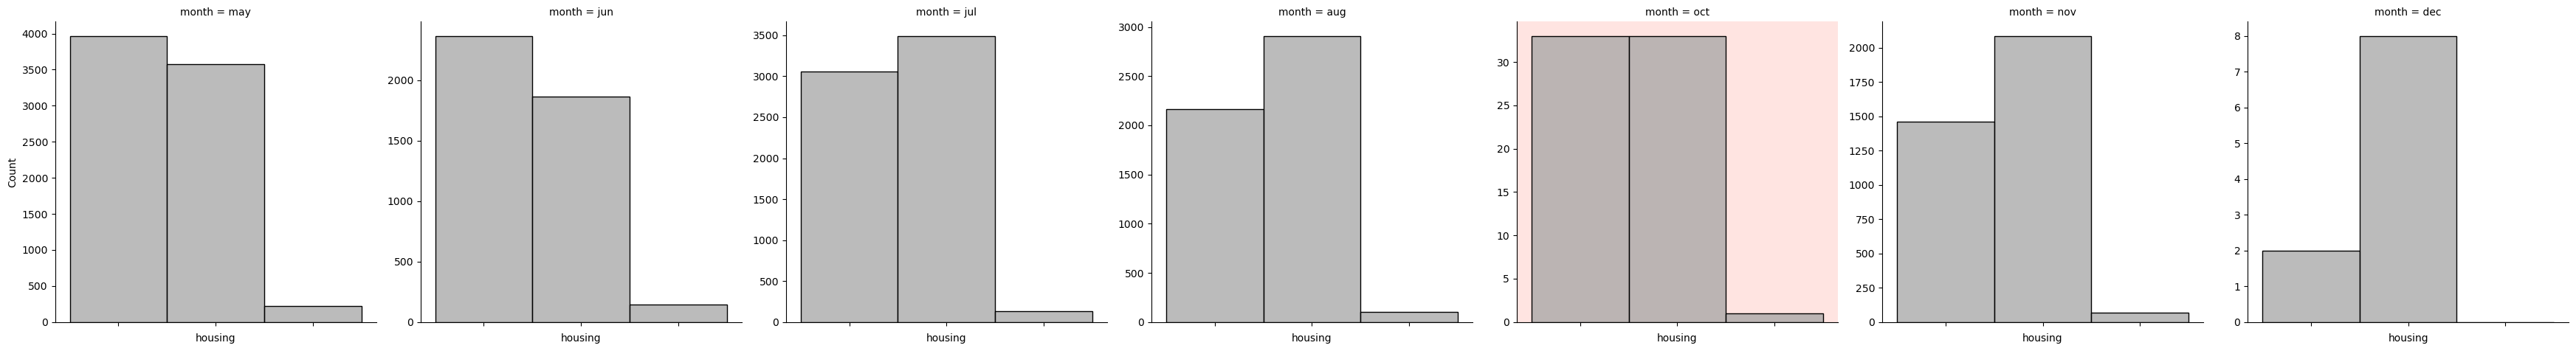

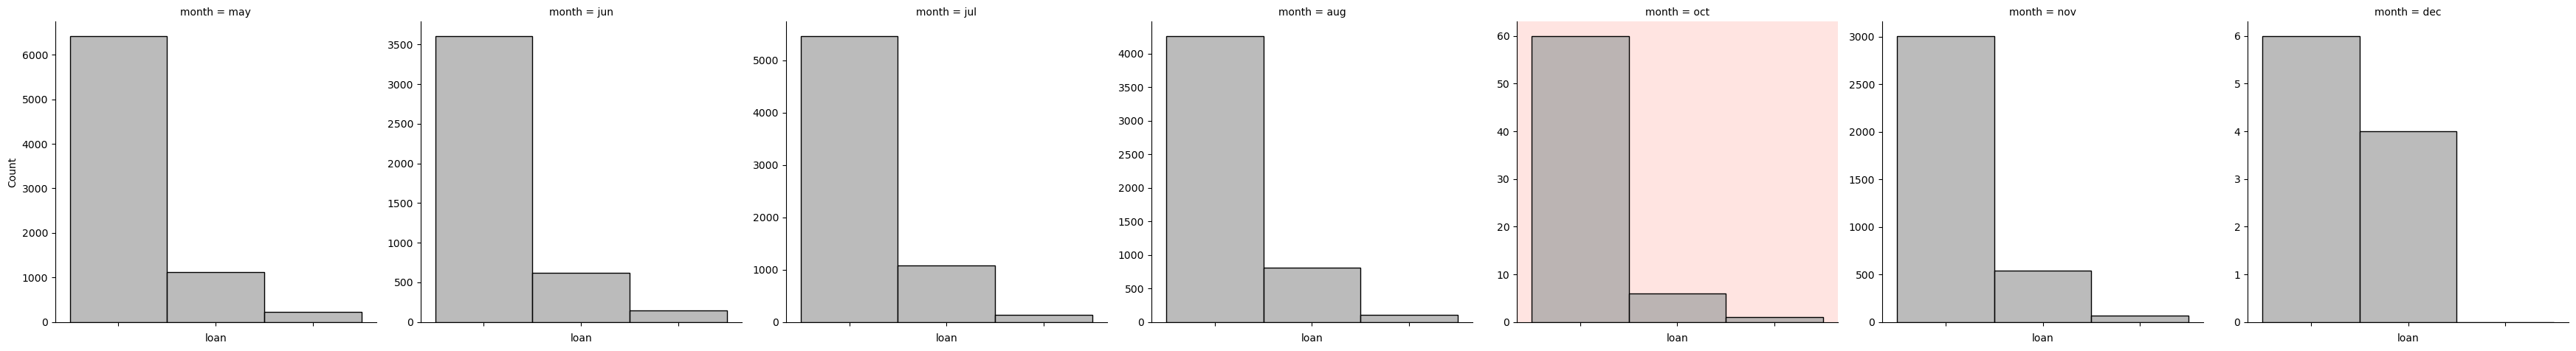

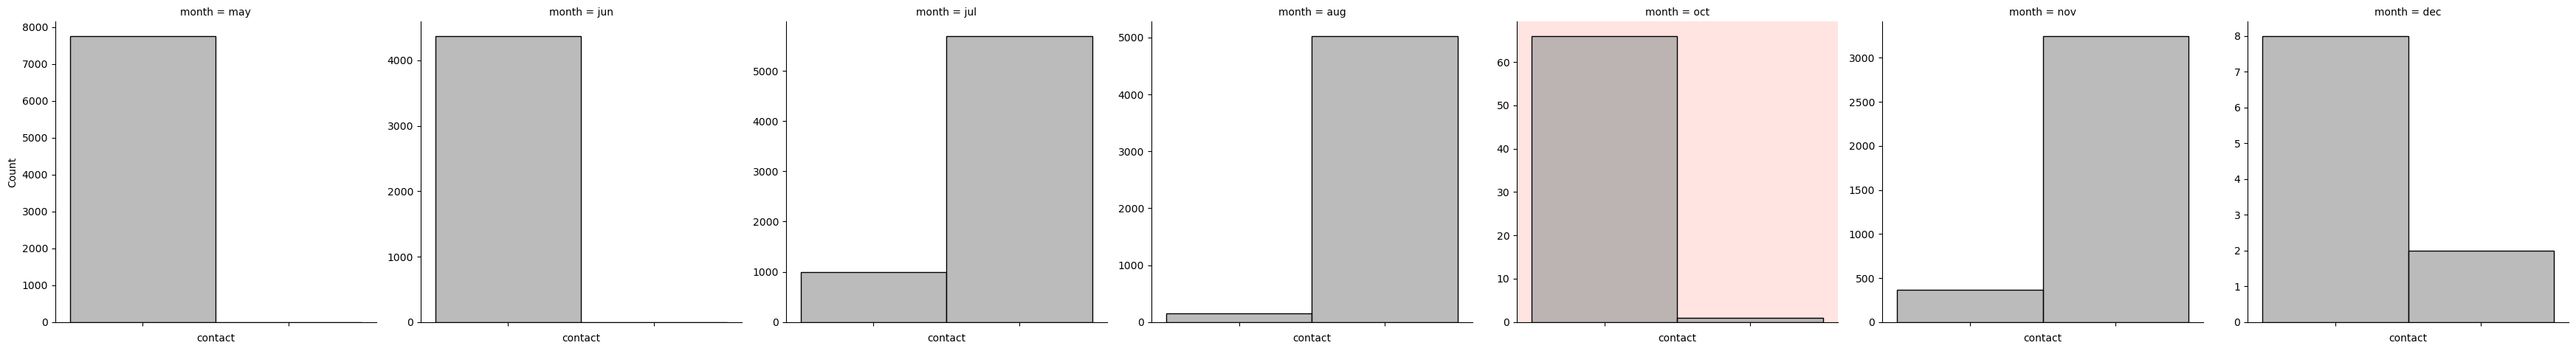

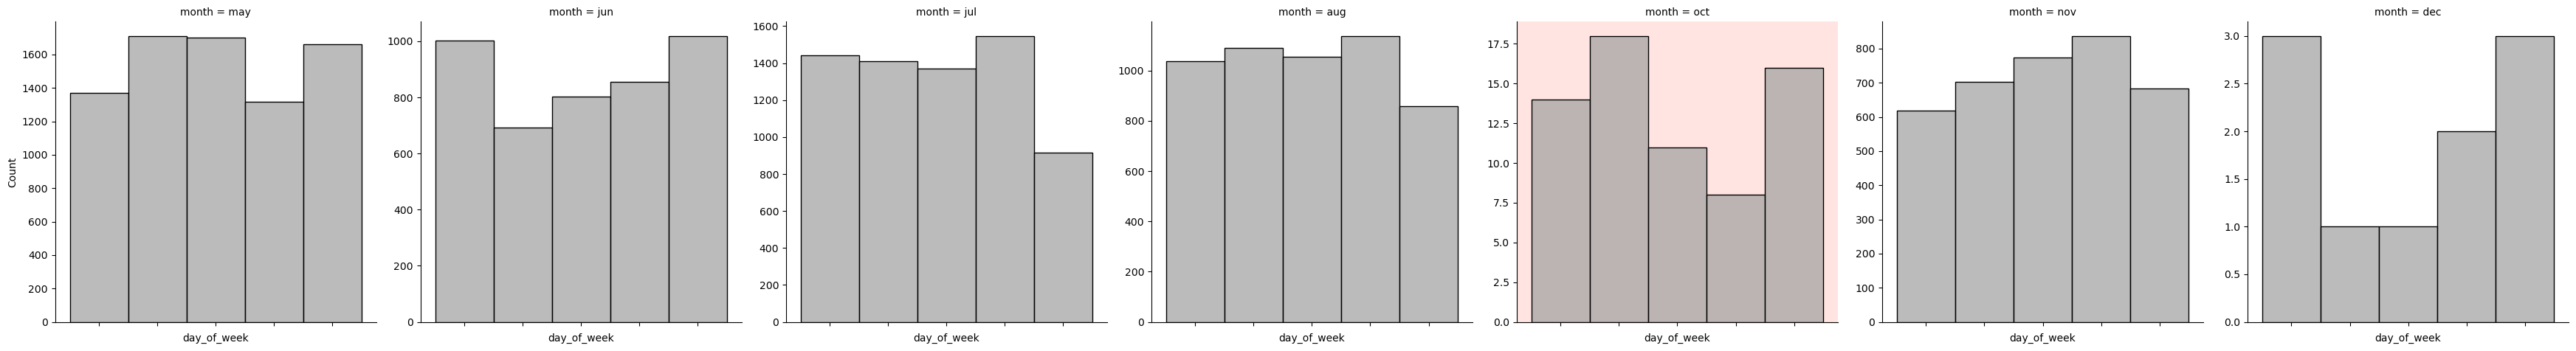

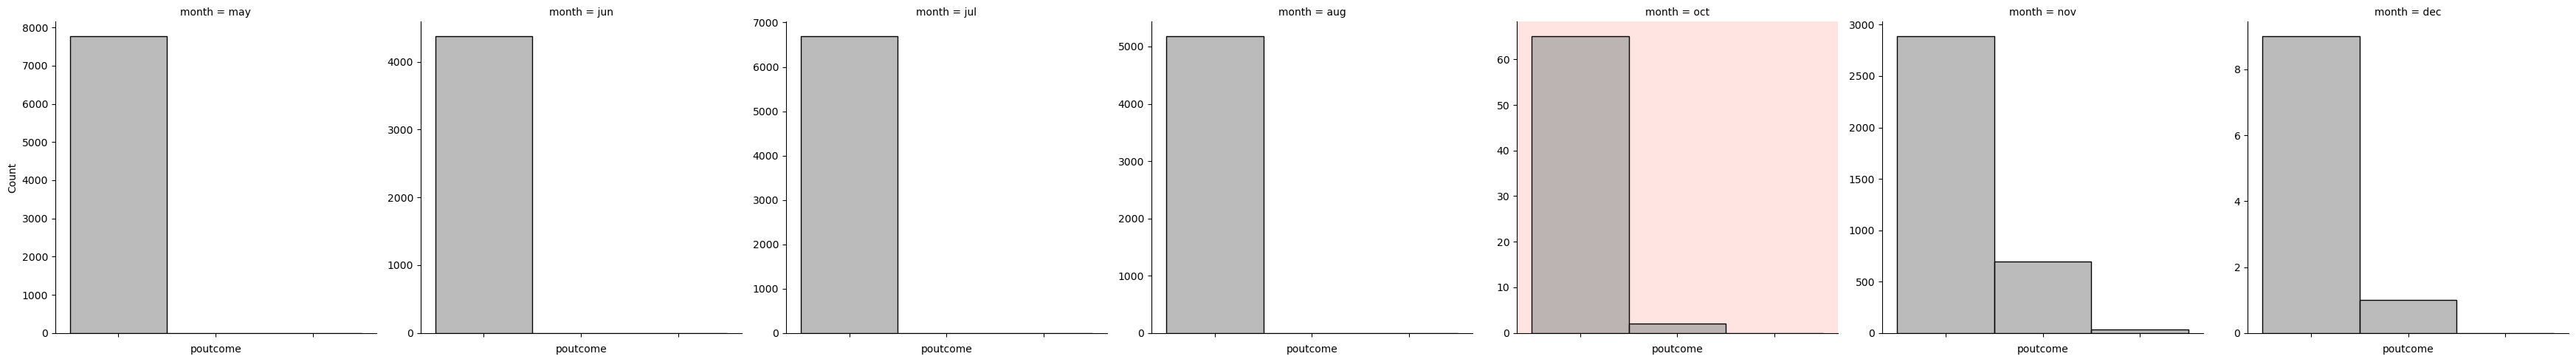

In [29]:
print('=' * 100)
print(f'{"Distributions of categorical columns for a year of 2008":^100}')
print('=' * 100)

for row in categorical_cols[categorical_cols != 'month']:
    g = sns.displot(data=df_2008, x=df_2008[row], col='month', 
                    height=5, color='#a4a4a4', facet_kws={'sharey':False})
            
    for col_val, ax in g.axes_dict.items():
        if col_val == 'oct' or col_val == 'dec' and row == 'default':
            ax.set_facecolor('mistyrose')
    
    for axes in g.axes.flat:
        _ = axes.set_xticklabels([])
        
plt.tight_layout();

#### 3.2. Bank client data

Feature 1: AGE (numeric)

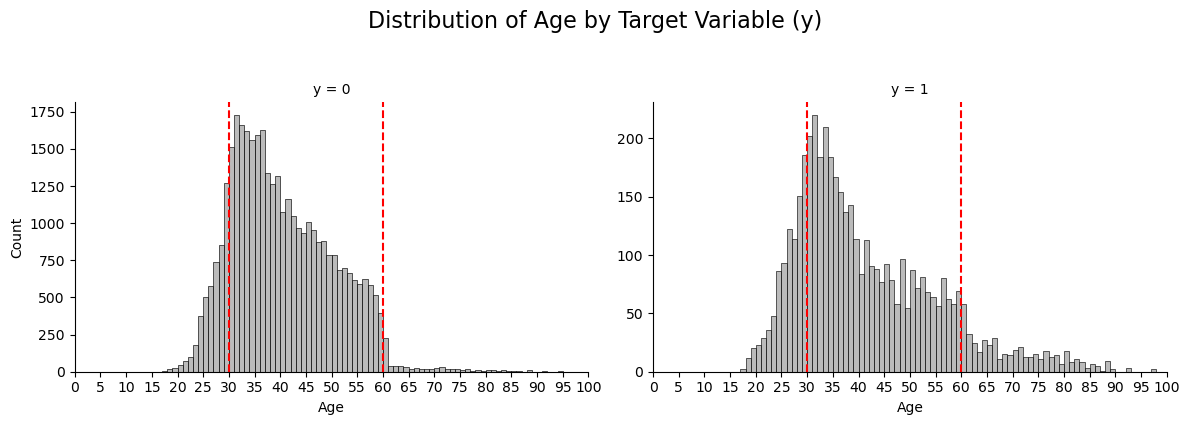

In [30]:
g = sns.FacetGrid(df, col="y", sharey=False, height=4, aspect=1.5)
g.map_dataframe(sns.histplot, x='age', binwidth=1, color='#a4a4a4')

for ax in g.axes.flat:
    ax.axvline(x=30, color='red', linestyle='dashed')
    ax.axvline(x=60, color='red', linestyle='dashed')

    ax.set_xticks(range(0, 101, 5))
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

g.set(xlim=(0, 100))
g.set_axis_labels("Age", "Count")
g.fig.suptitle('Distribution of Age by Target Variable (y)', fontsize=16, y=1.05)

plt.tight_layout()
plt.show()

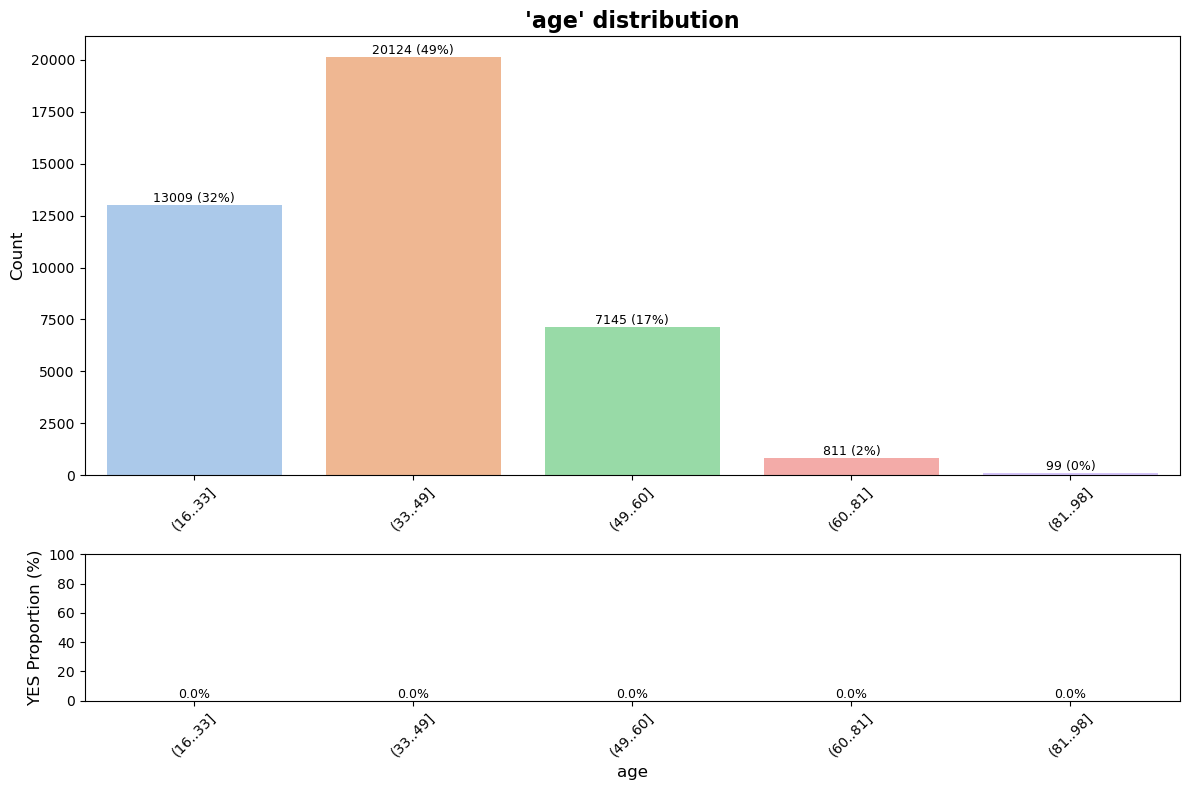

In [31]:
def plot_distribution_and_yes_proportion(df, feature_name, target_name='y', positive_class='yes', bins=None, labels=None):
    # Nếu cần bins cho feature số như age
    if bins and labels:
        df[f'{feature_name}_bins'] = pd.cut(df[feature_name], bins=bins, labels=labels, right=True)
        plot_feature = f'{feature_name}_bins'
    else:
        plot_feature = feature_name

    # Tính count và proportion
    feature_counts = df[plot_feature].value_counts().sort_index()
    feature_props = df.groupby(plot_feature)[target_name].apply(lambda x: (x == positive_class).mean()).sort_index()

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

    # Plot số lượng
    sns.barplot(x=feature_counts.index, y=feature_counts.values, ax=ax1, palette="pastel")
    ax1.set_ylabel('Count', fontsize=12)
    ax1.set_xlabel('')
    ax1.set_title(f"'{feature_name}' distribution", fontsize=16, weight='bold')
    ax1.bar_label(ax1.containers[0], labels=[f"{v} ({v*100/feature_counts.sum():.0f}%)" for v in feature_counts.values], fontsize=9)
    ax1.tick_params(axis='x', rotation=45)

    # Plot tỷ lệ YES
    sns.barplot(x=feature_props.index, y=feature_props.values * 100, ax=ax2, palette="coolwarm")
    ax2.set_ylabel('YES Proportion (%)', fontsize=12)
    ax2.set_xlabel(feature_name, fontsize=12)
    ax2.set_ylim(0, 100)
    ax2.bar_label(ax2.containers[0], labels=[f"{v*100:.1f}%" for v in feature_props.values], fontsize=9)
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# -------------------------------------------------
# Ví dụ dùng cho age:
bins = [16, 33, 49, 60, 81, 98]
labels = ['(16..33]', '(33..49]', '(49..60]', '(60..81]', '(81..98]']

plot_distribution_and_yes_proportion(df, feature_name='age', bins=bins, labels=labels)


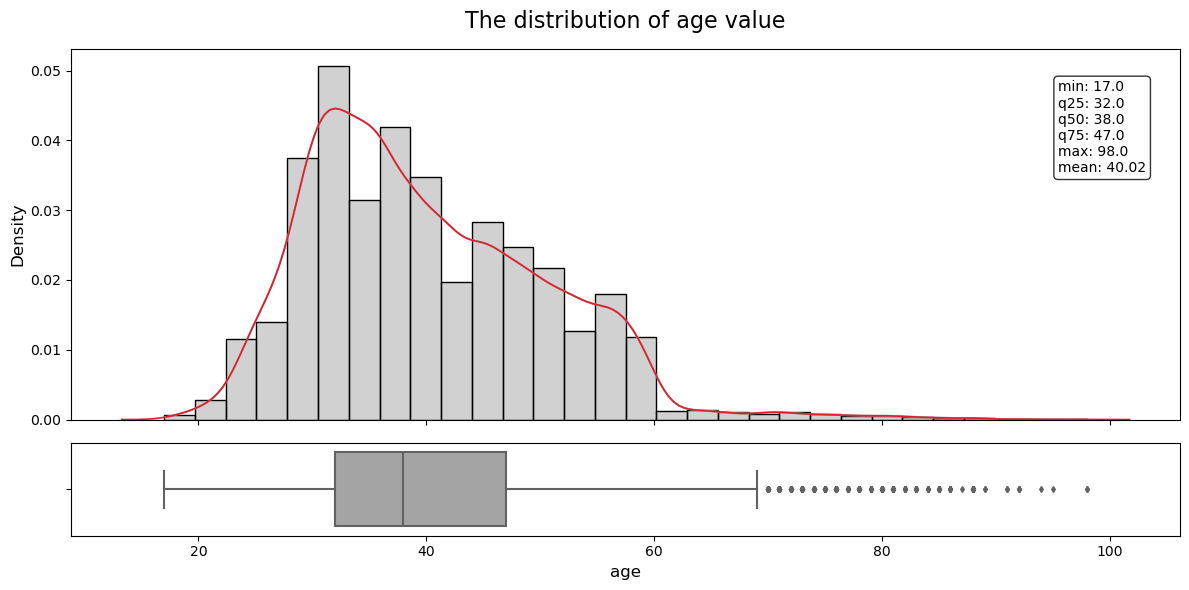

In [32]:
def plot_numerical_distribution(df, feature_name):
    fig, axes = plt.subplots(2, 1, figsize=(12, 6), 
                             gridspec_kw={'height_ratios': [4, 1]}, 
                             sharex=True)

    # --- Phần Histogram + KDE ---
    sns.histplot(df[feature_name], kde=True, ax=axes[0], color="#a4a4a4", edgecolor="black", bins=30, stat='density')
    sns.kdeplot(df[feature_name], color="#e41c29", ax=axes[0], linewidth=1.2)

    axes[0].set_title(f"The distribution of {feature_name} value", fontsize=16, pad=15)
    axes[0].set_ylabel("Density", fontsize=12)

    # Thống kê
    min_val = df[feature_name].min()
    q25 = df[feature_name].quantile(0.25)
    median = df[feature_name].median()
    q75 = df[feature_name].quantile(0.75)
    max_val = df[feature_name].max()
    mean_val = df[feature_name].mean()

    stats_text = f"min: {min_val:.1f}\nq25: {q25:.1f}\nq50: {median:.1f}\nq75: {q75:.1f}\nmax: {max_val:.1f}\nmean: {mean_val:.2f}"
    axes[0].text(0.89, 0.915, stats_text, fontsize=10, transform=axes[0].transAxes,
                 verticalalignment='top', horizontalalignment='left',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # --- Phần Boxplot ---
    sns.boxplot(x=df[feature_name], ax=axes[1], color="#a4a4a4", linewidth=1.5, fliersize=3)
    axes[1].set_xlabel(feature_name, fontsize=12)

    plt.tight_layout()
    plt.show()

# Gọi hàm:
plot_numerical_distribution(df, feature_name='age')


In [33]:
feature_name = 'age'
print(f'Pearson corr. coef. ({feature_name} vs y): {df[feature_name].corr(df["y"]):.4f}')

Pearson corr. coef. (age vs y): 0.0304


<u>_Conclusion:_</u>  
- Median age: 38 years old & Mean age: ~40 years old
- Dù số lượng khách hàng đăng ký ít hơn, nhưng biểu đồ cho thấy phân phối đồng đều hơn so với nhóm không đăng ký.
- Sau ngưỡng 60 tuổi, số lượng khách hàng đồng ý đăng ký tiền gửi không giảm mạnh như nhóm y = 0. Thậm chí, tỷ lệ khách hàng lớn tuổi đồng ý đăng ký cao hơn so với các nhóm tuổi khác.

Feature 2: JOB

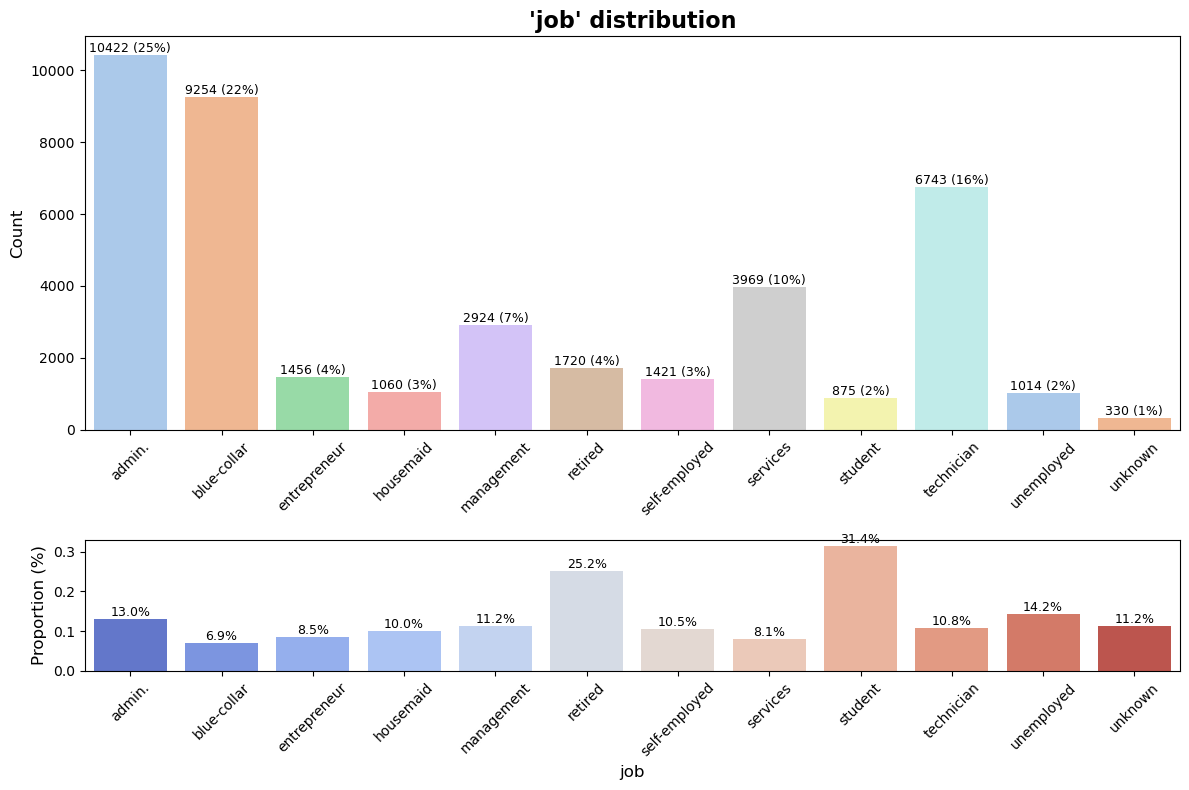

In [34]:
plot_categorical_distribution_with_target(df, 'job', 'y')

<u>_Conclusion:_</u>  


Feature 3: MARITAL

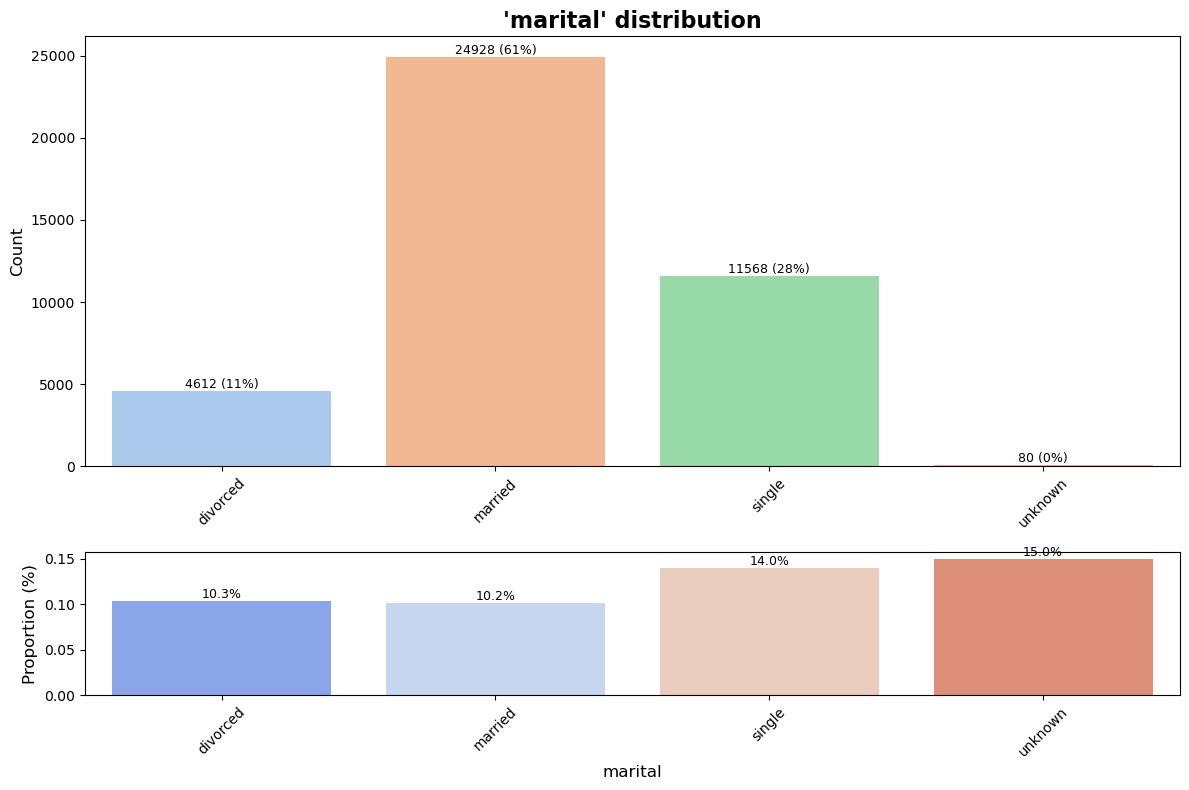

In [35]:
plot_categorical_distribution_with_target(df, 'marital', 'y')

<u>_Conclusion:_</u>  


Feature 4: EDUCATION

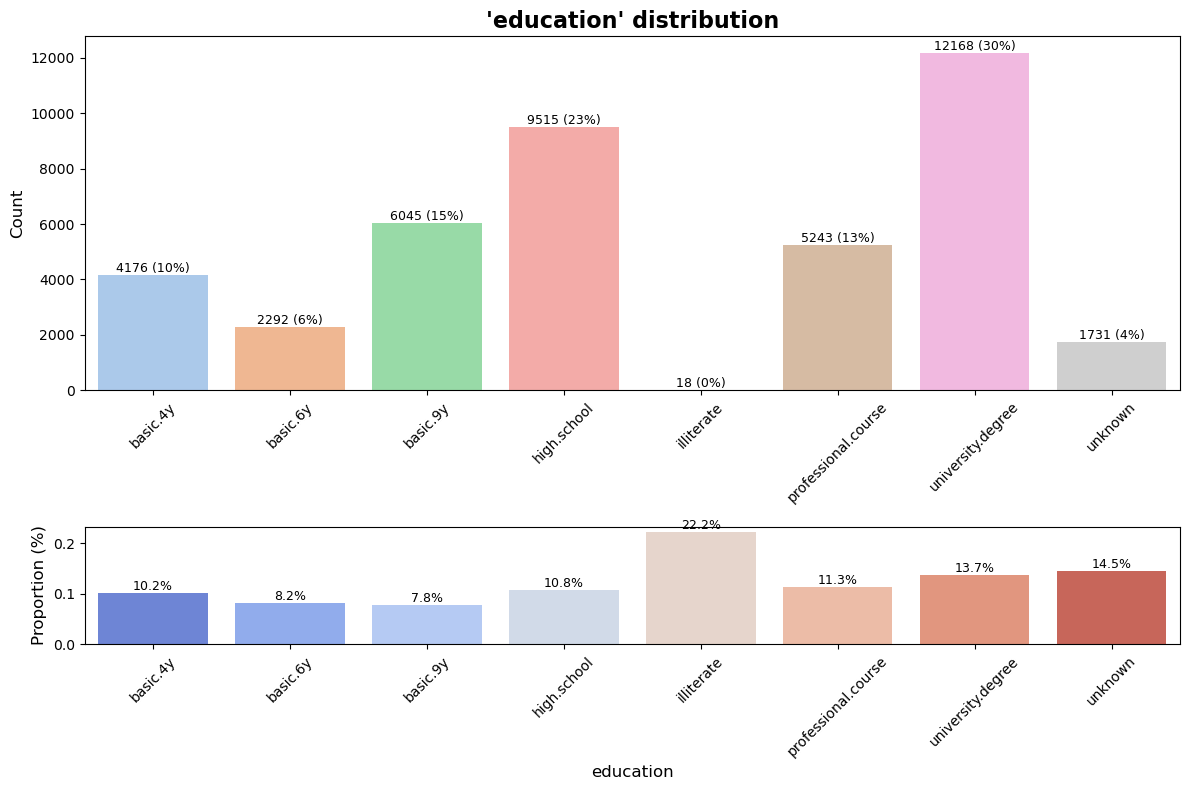

In [36]:
plot_categorical_distribution_with_target(df, 'education', 'y')

<u>_Conclusion:_</u>  

Feature 5: DEFAULT

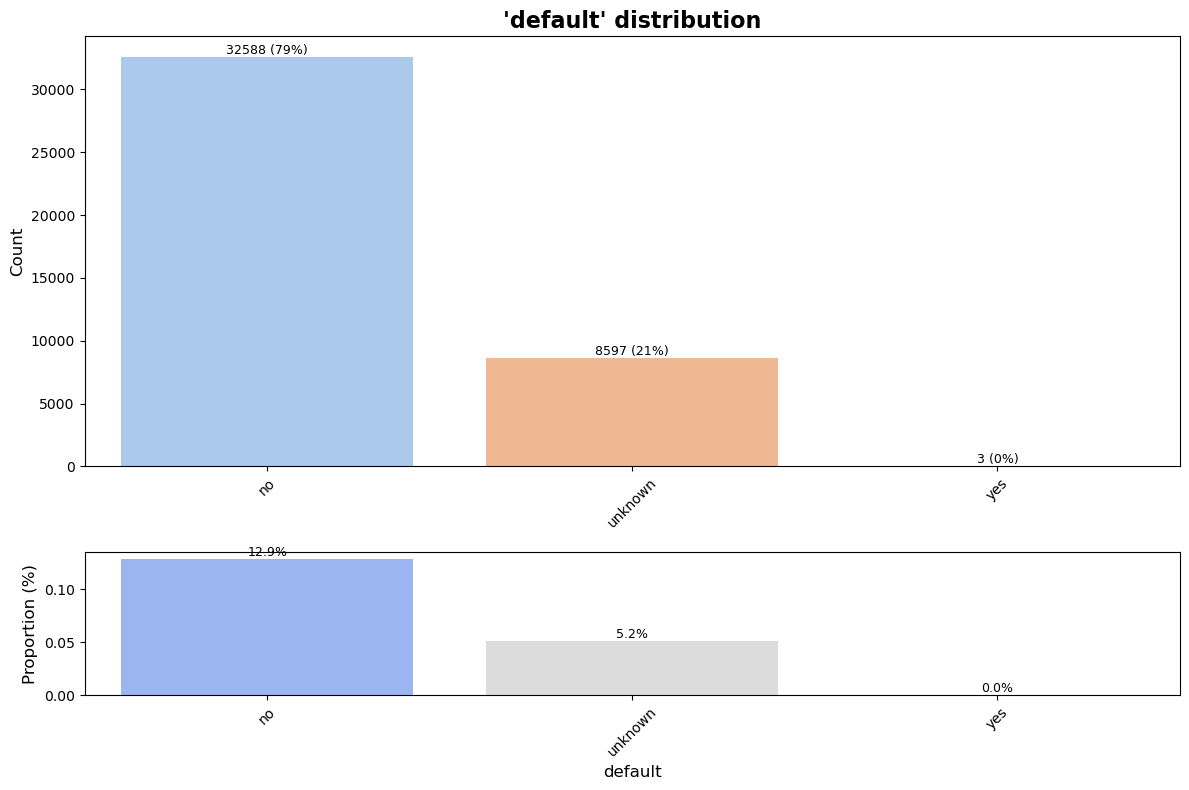

In [37]:
plot_categorical_distribution_with_target(df, 'default', 'y')

<u>_Conclusion:_</u>  

Feature 6: HOUSING

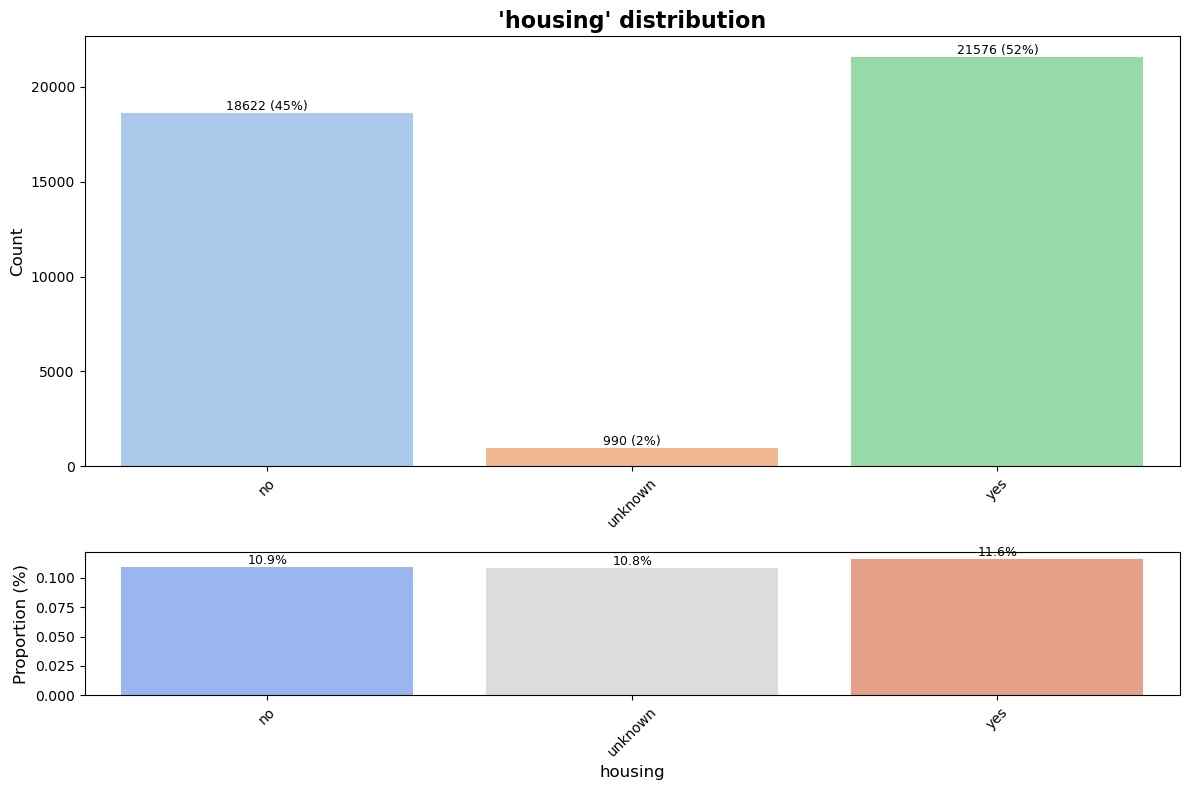

In [38]:
plot_categorical_distribution_with_target(df, 'housing', 'y')

<u>_Conclusion:_</u>  


Feature 7: LOAN

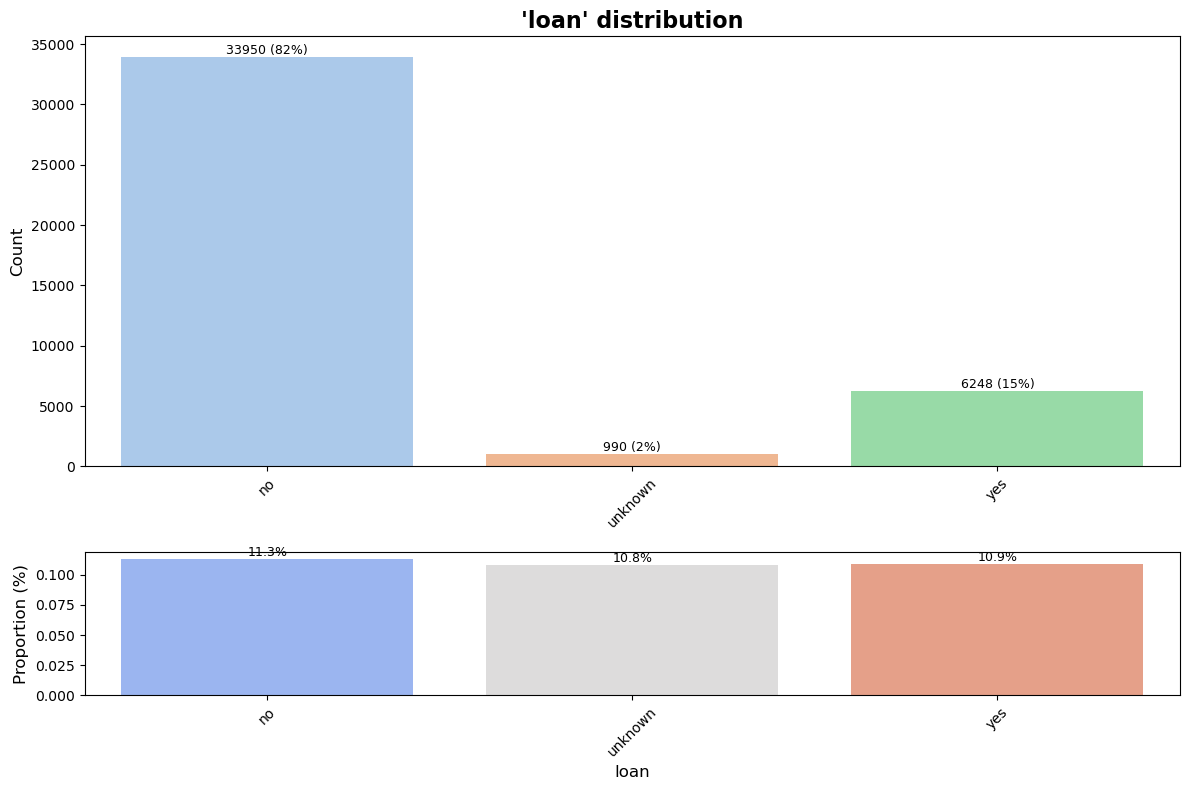

In [39]:
plot_categorical_distribution_with_target(df, 'loan', 'y')

<u>_Conclusion:_</u>  


#### 3.3. Related with the last contact of the current campaign

Feature 8: contact (categorical)

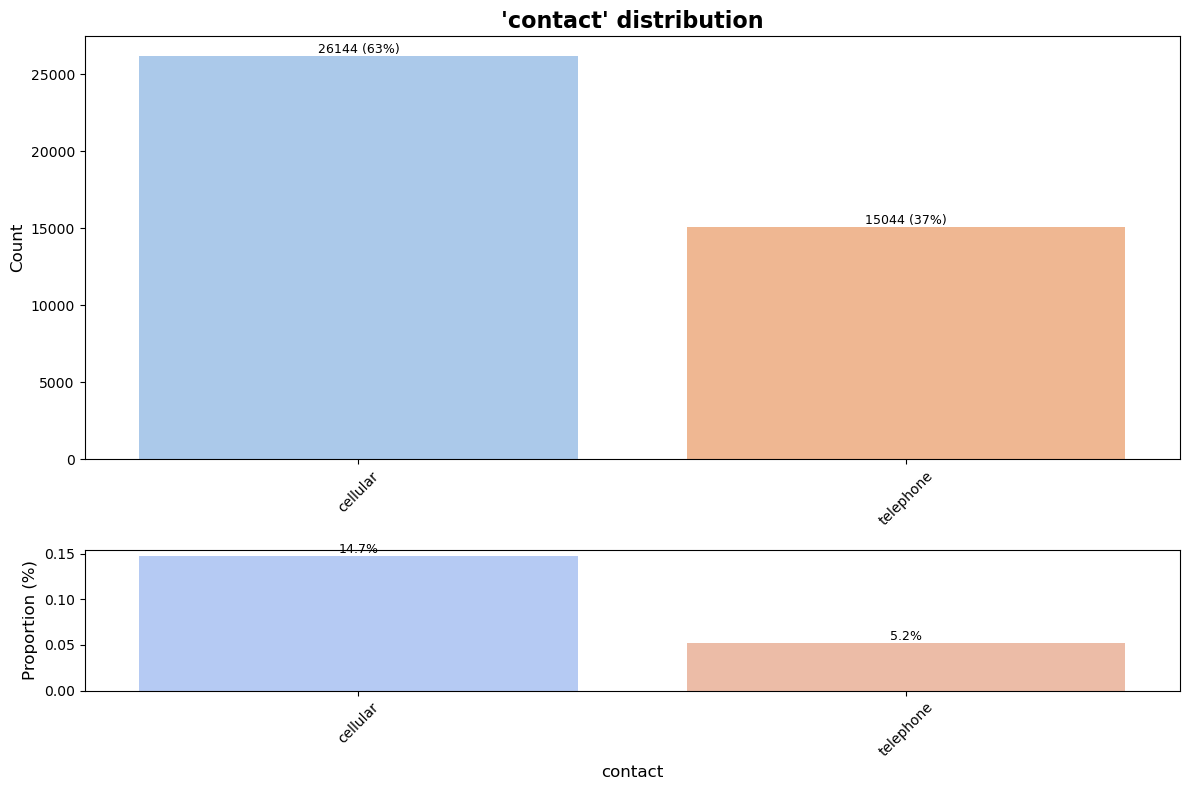

In [40]:
plot_categorical_distribution_with_target(df, 'contact', 'y')

In [41]:
# fig, axes = plt.subplots(2, 1, figsize=(15, 3), sharex=True)

# my_utils.plot_yes_proportion_by(by='month', df_=df[(df['year'] == 2010) &
#                                                    (df['contact'] == 'cellular')], 
#                                 feature_name='contact', fig=fig, ax=axes[0])
# my_utils.plot_observations_by(by='month', df_=df[(df['year'] == 2010) &
#                                                    (df['contact'] == 'cellular')], 
#                                 feature_name='contact', fig=fig, ax=axes[1])

# axes[0].set_xlabel('')
# axes[1].set_title('')
# axes[0].set_title('YES-proportion and observations of `cellular` contact by months of 2010', 
#                   fontsize=16, pad=20)
# plt.tight_layout()

Feature 9: month (categorical)

`month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Feature 10: day_of_week (categorical)

`day_of_week`: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

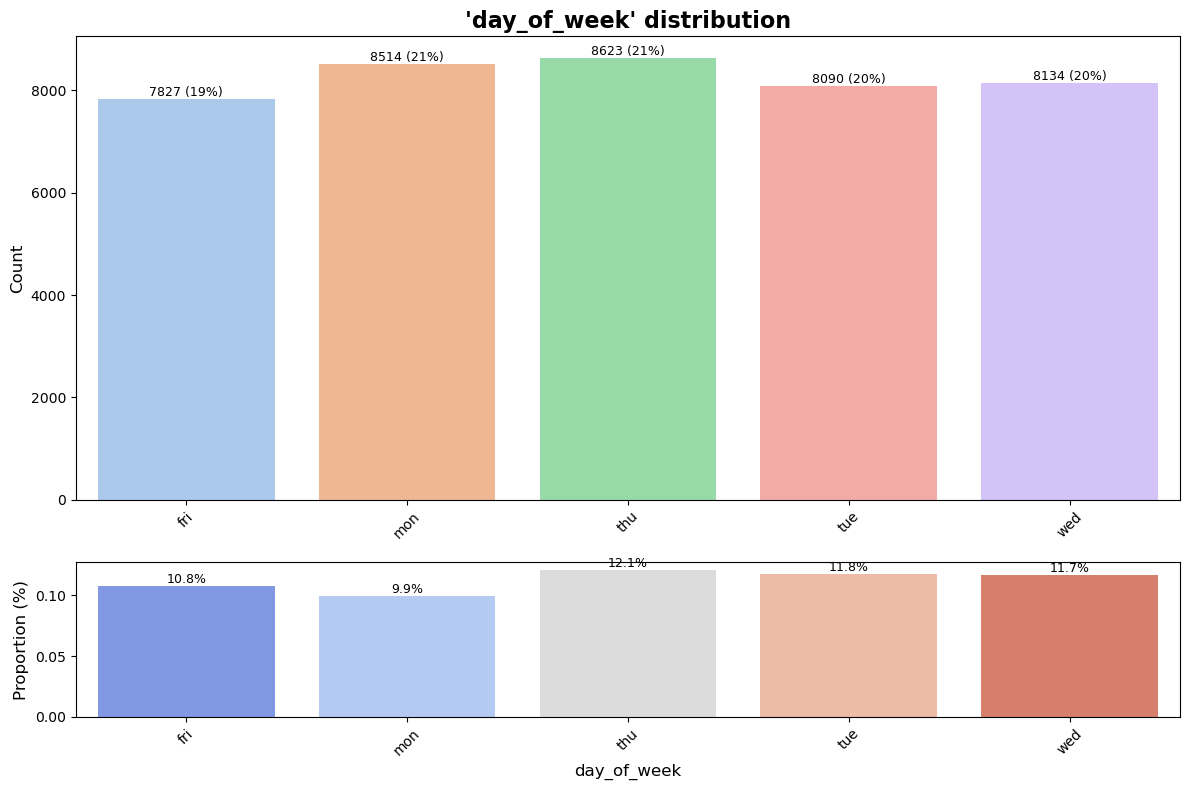

In [42]:
plot_categorical_distribution_with_target(df, 'day_of_week', 'y')

Feature 11: duration (numerical)

`duration`: last contact duration, in seconds (numeric)
> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

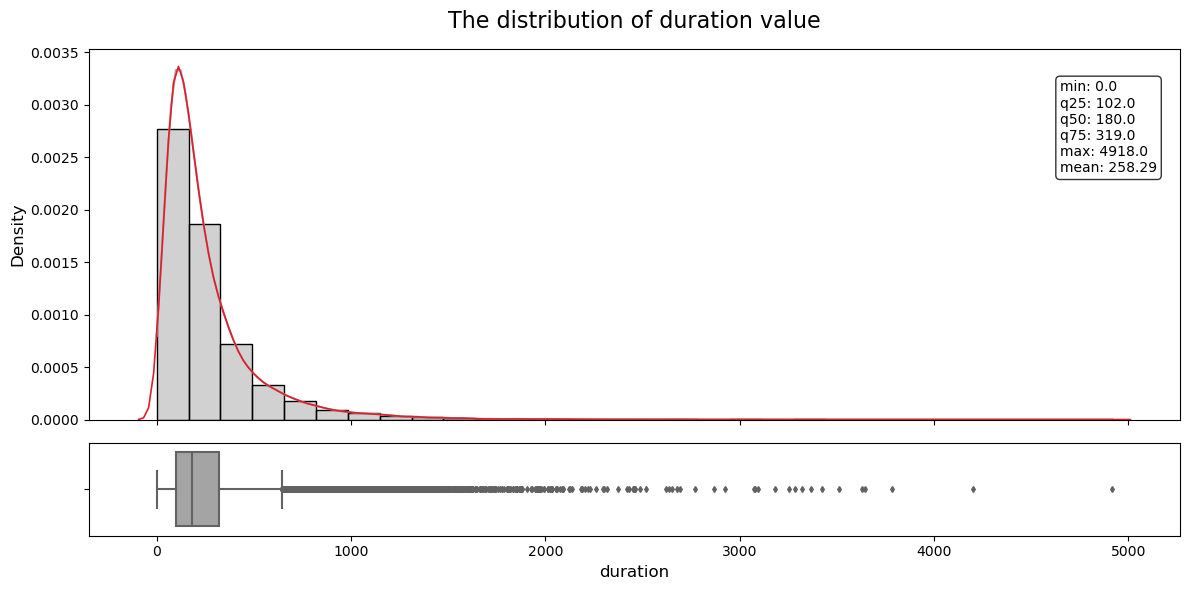

In [43]:
plot_numerical_distribution(df, 'duration')

In [44]:
feature_name = 'duration'
print(f'Pearson corr. coef. ({feature_name} vs y): {df[feature_name].corr(df["y"]):.4f}')

Pearson corr. coef. (duration vs y): 0.4053


<u>_Conclusion:_</u>  
- If we consider only first 3-4 groups (with enough number of observations), it's pretty obvious that the longer the call is the higher chances are to get a positive decision (and the common sense says the same).
- And we also shouldn't forget about the important note, that says: "this attribute highly affects the output target (e.g., if duration=0 then y='no')".

#### 3.4. Other attributes

Feature 12: campaign (numerical)

`campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)



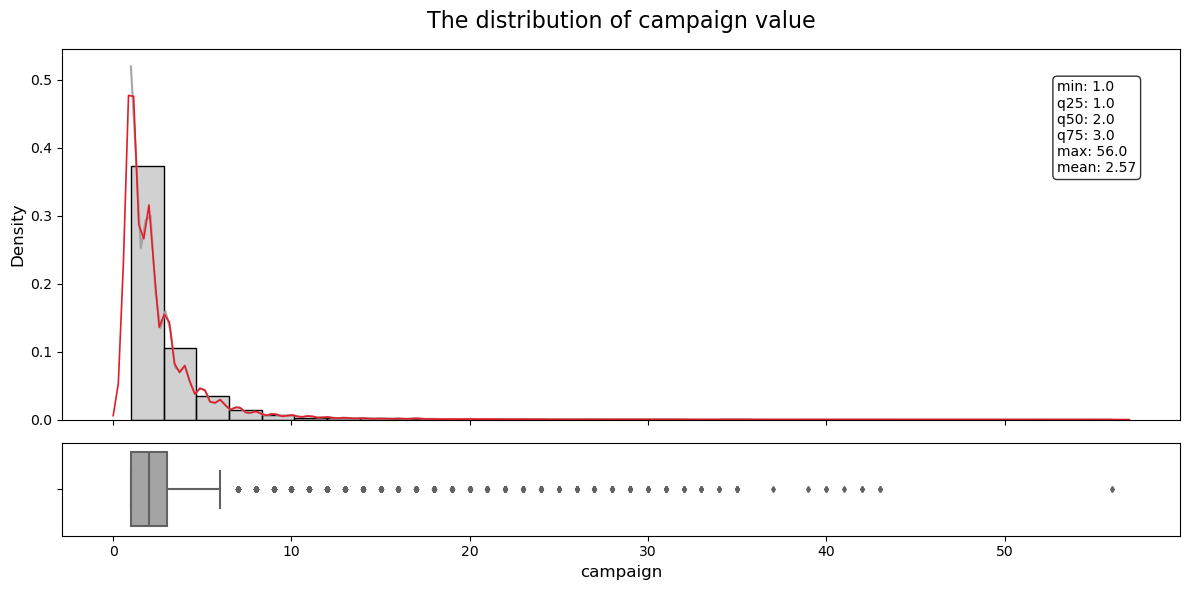

In [45]:
plot_numerical_distribution(df, 'campaign')

In [46]:
feature_name = 'duration'
print(f'Pearson corr. coef. ({feature_name} vs y): {df[feature_name].corr(df["y"]):.4f}')

Pearson corr. coef. (duration vs y): 0.4053


There is a weak correlation between previous and y.



<u>_Conclusion:_</u>  


Feature 13: pdays (numerical)

`pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric - 999 means client was not previously contacted)


In [47]:
def plot_numerical_distribution_1(df, feature_name):
    fig, axes = plt.subplots(2, 1, figsize=(12, 6), 
                             gridspec_kw={'height_ratios': [4, 1]}, 
                             sharex=True)

    # --- Phần Histogram + KDE ---
    sns.histplot(df[feature_name], kde=True, ax=axes[0], color="#a4a4a4", edgecolor="black", bins=30, stat='density')
    sns.kdeplot(df[feature_name], color="#e41c29", ax=axes[0], linewidth=2)

    axes[0].set_title(f"The distribution of {feature_name} value", fontsize=16, pad=15)
    axes[0].set_ylabel("Density", fontsize=12)

    # Thống kê
    min_val = df[feature_name].min()
    q25 = df[feature_name].quantile(0.25)
    median = df[feature_name].median()
    q75 = df[feature_name].quantile(0.75)
    max_val = df[feature_name].max()
    mean_val = df[feature_name].mean()

    stats_text = f"min: {min_val:.1f}\nq25: {q25:.1f}\nq50: {median:.1f}\nq75: {q75:.1f}\nmax: {max_val:.1f}\nmean: {mean_val:.2f}"
    axes[0].text(0.031, 0.92, stats_text, fontsize=10, transform=axes[0].transAxes,
                 verticalalignment='top', horizontalalignment='left',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # --- Phần Boxplot ---
    sns.boxplot(x=df[feature_name], ax=axes[1], color="#a4a4a4", linewidth=1.5, fliersize=3)
    axes[1].set_xlabel(feature_name, fontsize=12)
    axes[0].grid(False)
    plt.tight_layout()
    plt.show()


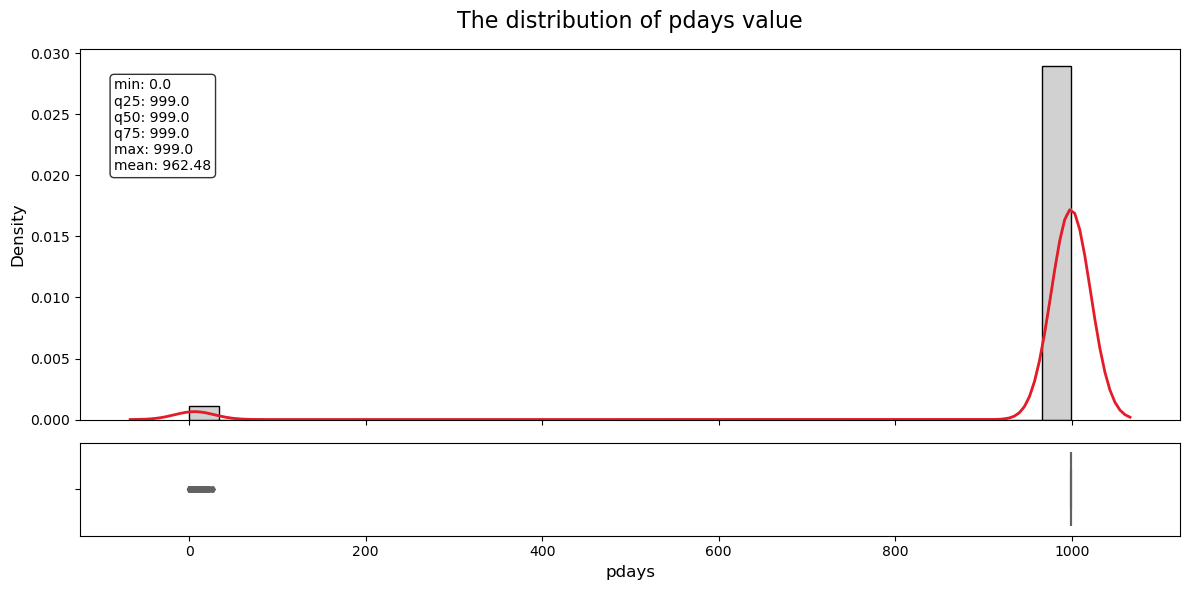

In [48]:
plot_numerical_distribution_1(df, 'pdays')

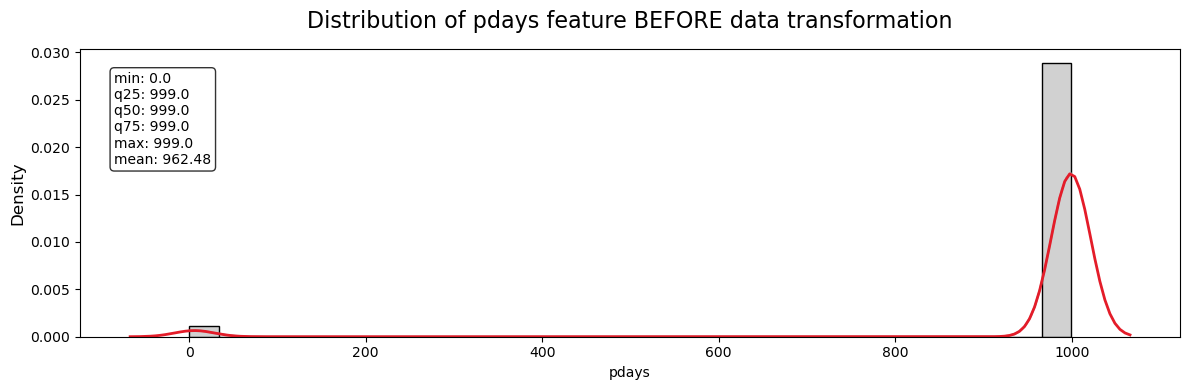

In [49]:
def plot_1(df, feature_name):
    # Create a single figure
    fig, axes = plt.subplots(figsize=(12, 4))

    # --- Phần Histogram + KDE ---
    sns.histplot(df[feature_name], kde=True, ax=axes, color="#a4a4a4", edgecolor="black", bins=30, stat='density')
    sns.kdeplot(df[feature_name], color="#e41c29", ax=axes, linewidth=2)

    axes.set_title(f"Distribution of {feature_name} feature BEFORE data transformation", fontsize=16, pad=15)
    axes.set_ylabel("Density", fontsize=12)

    # Thống kê
    min_val = df[feature_name].min()
    q25 = df[feature_name].quantile(0.25)
    median = df[feature_name].median()
    q75 = df[feature_name].quantile(0.75)
    max_val = df[feature_name].max()
    mean_val = df[feature_name].mean()

    stats_text = f"min: {min_val:.1f}\nq25: {q25:.1f}\nq50: {median:.1f}\nq75: {q75:.1f}\nmax: {max_val:.1f}\nmean: {mean_val:.2f}"
    axes.text(0.031, 0.92, stats_text, fontsize=10, transform=axes.transAxes,
              verticalalignment='top', horizontalalignment='left',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_1(df, feature_name='pdays')


Let's replace `999` with `-1` and repeat the analysis:

In [50]:
# df['pdays'] = df['pdays'].replace({999: -1})

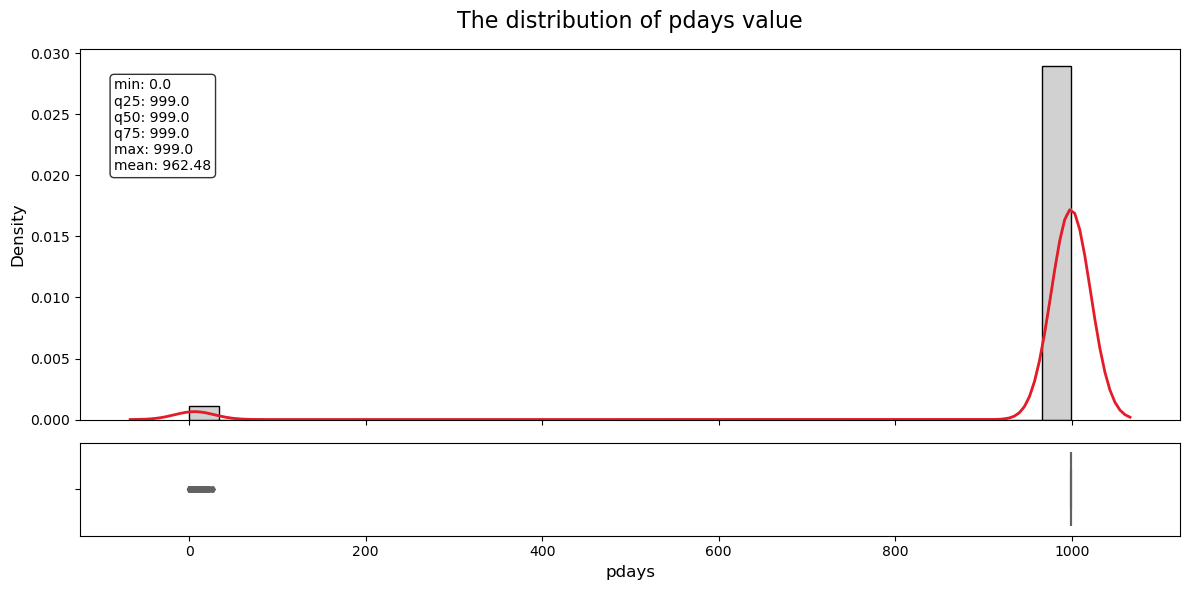

<Figure size 640x480 with 0 Axes>

In [51]:
plot_numerical_distribution_1(df, 'pdays')
plt.tight_layout()



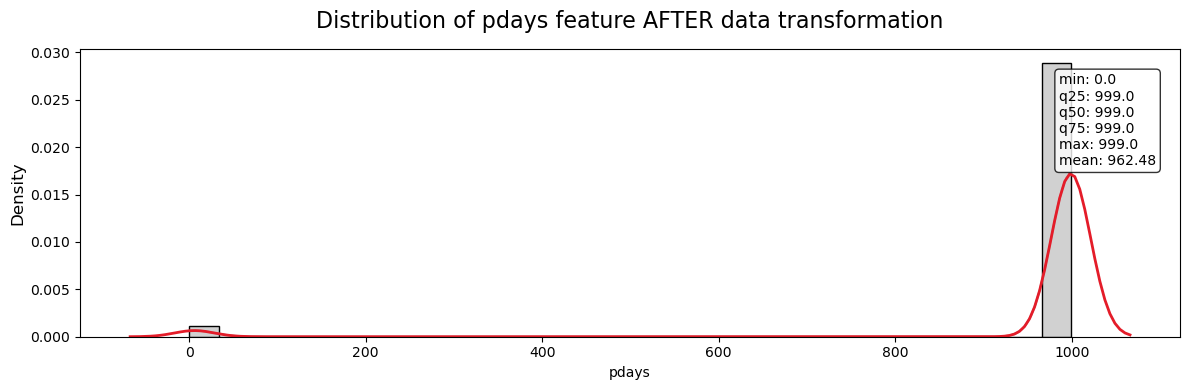

In [52]:
def plot_2(df, feature_name):
    # Create a single figure
    fig, axes = plt.subplots(figsize=(12, 4))

    # --- Phần Histogram + KDE ---
    sns.histplot(df[feature_name], kde=True, ax=axes, color="#a4a4a4", edgecolor="black", bins=30, stat='density')
    sns.kdeplot(df[feature_name], color="#e41c29", ax=axes, linewidth=2)

    axes.set_title(f"Distribution of {feature_name} feature AFTER data transformation", fontsize=16, pad=15)
    axes.set_ylabel("Density", fontsize=12)

    # Thống kê
    min_val = df[feature_name].min()
    q25 = df[feature_name].quantile(0.25)
    median = df[feature_name].median()
    q75 = df[feature_name].quantile(0.75)
    max_val = df[feature_name].max()
    mean_val = df[feature_name].mean()

    stats_text = f"min: {min_val:.1f}\nq25: {q25:.1f}\nq50: {median:.1f}\nq75: {q75:.1f}\nmax: {max_val:.1f}\nmean: {mean_val:.2f}"
    axes.text(0.89, 0.915, stats_text, fontsize=10, transform=axes.transAxes,
                 verticalalignment='top', horizontalalignment='left',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_2(df, feature_name='pdays')


In [53]:
feature_name = 'pdays'
print(f'Pearson corr. coef. ({feature_name} vs y): {df[feature_name].corr(df["y"]):.4f}')

Pearson corr. coef. (pdays vs y): -0.3249


In [54]:
df['pdays'].value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

There is a weak correlation between pdays and y.

<u>_Conclusion:_</u>  


Feature 14: previous (numerical)

`previous`: number of contacts performed before this campaign and for this client (numeric)

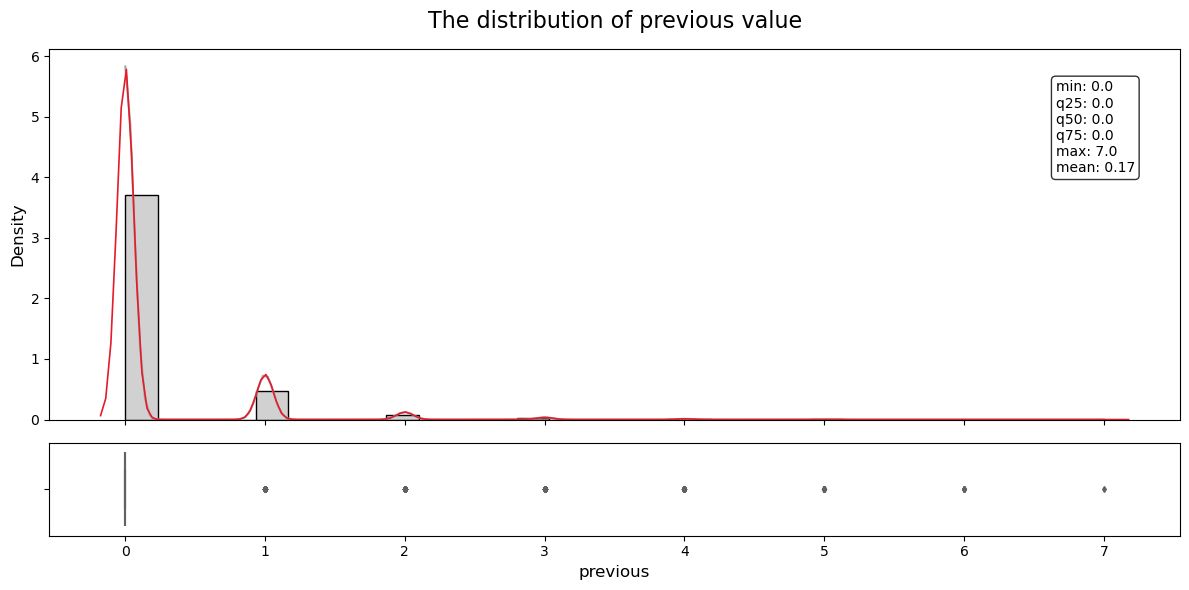

In [55]:
plot_numerical_distribution(df, 'previous')

In [56]:
df['previous'].nunique()

8

As we got such a small number of unique values here, let's analyse it as a categorical feature just for a convenience:

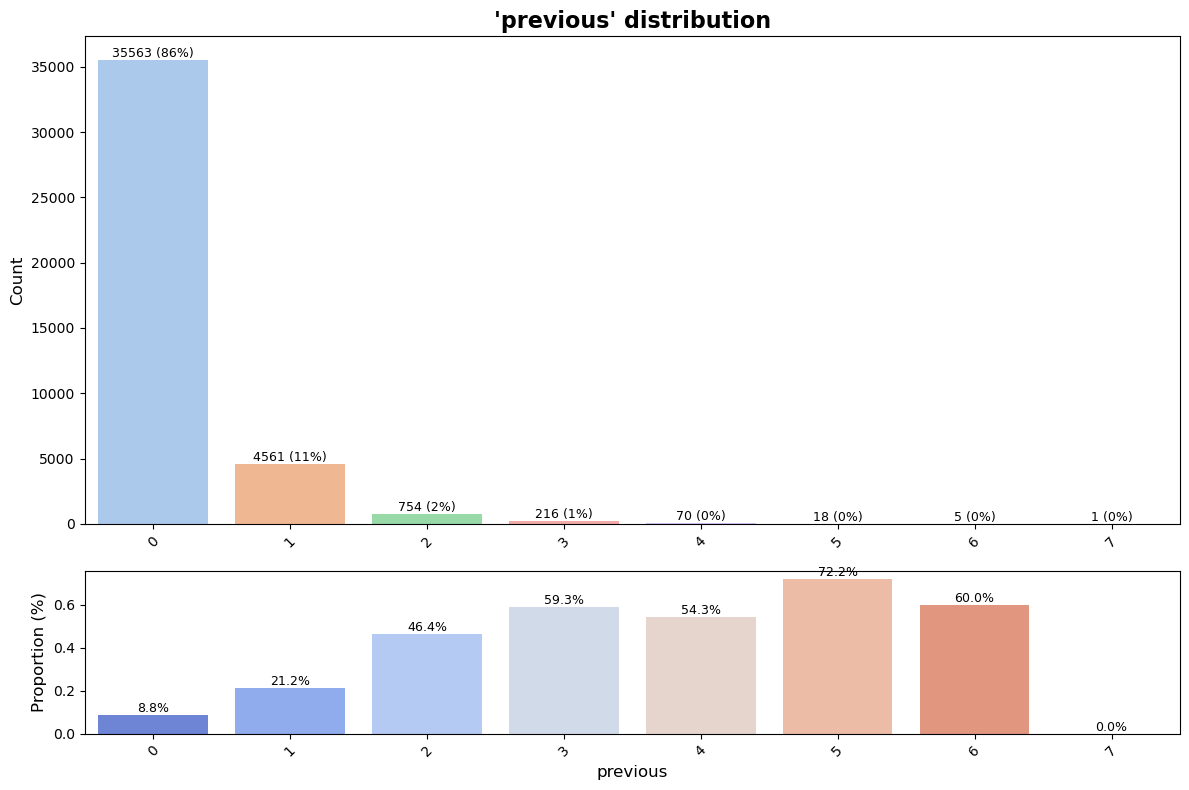

In [57]:
plot_categorical_distribution_with_target(df, 'previous')

In [58]:
feature_name = 'previous'
print(f'Pearson corr. coef. ({feature_name} vs y): {df[feature_name].corr(df["y"]):.4f}')

Pearson corr. coef. (previous vs y): 0.2302


There is a weak correlation between `previous` and `y`.

<u>_Conclusion:_</u>  


Feature 15: poutcome (categorical)

`poutcome`: outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")

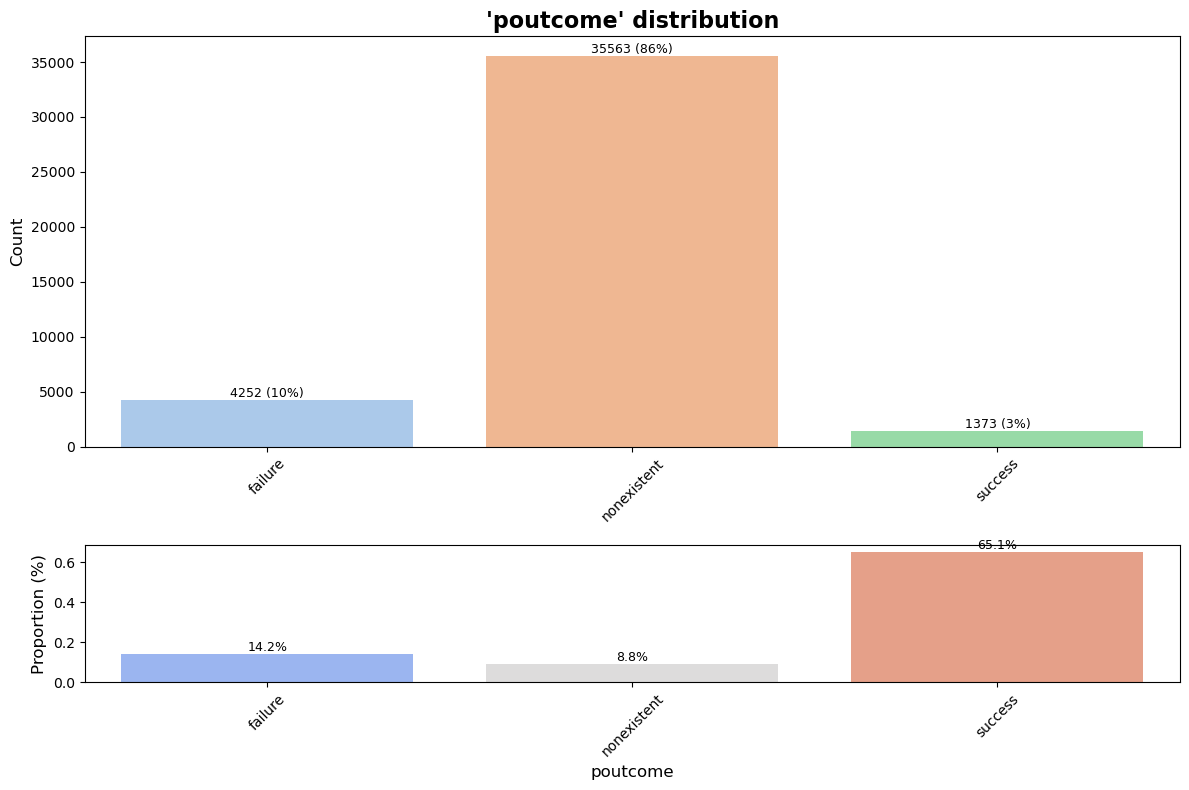

In [59]:
plot_categorical_distribution_with_target(df, 'poutcome')

#### 3.5. Social and economic context attributes

**Note:** We are going to analyse next features using our new feature - year.

[Text(0.5, 0, 'emp.var.rate'),
 Text(1.5, 0, 'cons.price.idx'),
 Text(2.5, 0, 'cons.conf.idx'),
 Text(3.5, 0, 'euribor3m'),
 Text(4.5, 0, 'nr.employed'),
 Text(5.5, 0, 'y')]

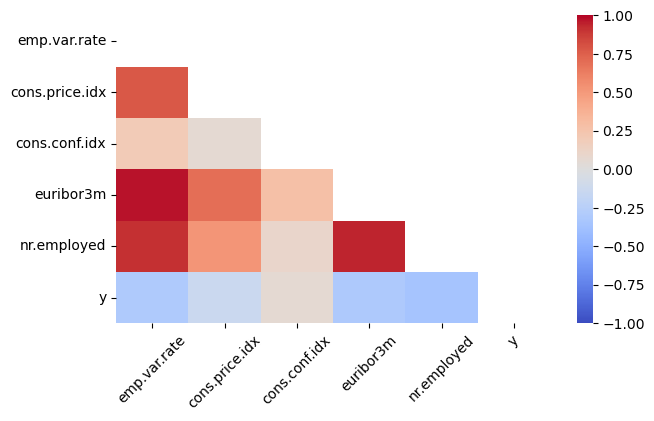

In [60]:
soc_econ_corr = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                'euribor3m', 'nr.employed', 'y']].corr()
mask = np.zeros_like(soc_econ_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(soc_econ_corr, vmin=-1, vmax=1, mask=mask, 
            annot=True, fmt='.2f', cmap=sns.color_palette('coolwarm', as_cmap=True), ax=ax);

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Strong correlation:

    - emp.var.rate and euribor3m (0.97)
    - nr.employed and euribor3m (0.95)
    - emp.var.rate and nr.employed (0.91)
    - emp.var.rate and cons.price.idx (0.78)


Pretty high correlation:

    - cons.price.idx and euribor3m (0.69)
    - cons.price.idx and nr.employed (0.52)


Explaination:

- `emp.var.rate`: employment variation rate (tỷ lệ thay đổi việc làm - theo quý)
    - Phản ánh tình hình thị trường lao động. Giá trị cao cho thấy tăng trưởng việc làm và ngược lại. Thị trường lao động kém có thể ảnh hưởng đến niềm tin tài chính của người dân, từ đó ảnh hưởng tới quyết định gửi tiết kiệm.
    
- `cons.price.idx`: consumer price index (chỉ số giá tiêu dùng - theo tháng)
    - Đo lường mức độ biến động giá cả hàng hoá và dịch vụ, phản ánh lạm phát. Khi CPI tăng cao, người tiêu dùng có xu hướng chi tiêu ít hơn, ảnh hưởng đến khả năng đầu tư, hoặc gửi tiền dài hạn.

- `cons.conf.idx`: consumer confidence index (chỉ số niềm tin người tiêu dùng - theo tháng)
    - Phản ánh tâm lý và kỳ vọng người tiêu dùng về nền kinh tế. Niềm tin cao thúc đẩy hành vi đầu tư như gửi tiết kiệm; ngược lại, niềm tin thấp thường đi kèm với tâm lý phòng thủ.

- `euribor3m`: lãi suất Euribor kỳ hạn 3 tháng
    - Đây là lãi suất mà các ngân hàng Châu Âu sẵn sàng cho nhau vay không có tài sản đảm bảo. Lãi suất cao có thể khiến người dân cân nhắc lại các quyết định đầu tư, đặc biệt là trong các sản phẩm tài chính như tiền gửi.

- `nr.employed`: tổng số người đang có việc làm trong nền kinh tế
    - Phản ánh sức khoẻ tổng thể của nền kinh tế và mức độ ổn định thu nhập của người dân. Số ng có việc làm càng cao, niềm tin tài chính và khả năng gửi tiền càng lớn.


Feature 16: emp.var.rate (numerical)

`emp.var.rate`:  employment variation rate - quarterly indicator (numeric)

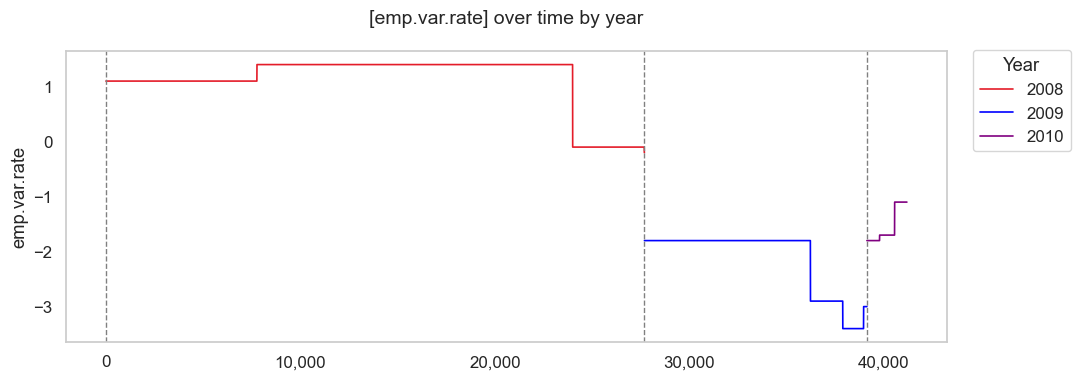

In [61]:
feature_name = 'emp.var.rate'

sns.set(style='whitegrid', font_scale=1.1)
fig, ax = plt.subplots(figsize=(11, 4))

colors = {2008: '#e41c29', 2009: 'blue', 2010: 'purple'}

for year in df['year'].unique():
    df_year = df[df['year'] == year]
    ax.plot(df_year.index, df_year[feature_name], label=str(year), color=colors[year], linewidth=1.2)

year_ticks = df.groupby('year').apply(lambda x: x.index[0]).values
for idx in year_ticks:
    ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)

ax.set_title(f"[{feature_name}] over time by year", fontsize=14, pad=20)
ax.set_ylabel(feature_name)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.legend(title='Year', bbox_to_anchor=(1.02, 1.035), loc='upper left', frameon=True)
ax.grid(False)

# sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

- 2008: The employment variation rate (emp.var.rate) fluctuates at a positive level, indicating relatively stable or slightly growing labor market conditions.

- 2009: There is a sharp decline into negative values, reflecting the severe impact of the global financial crisis (khủng hoảng tài chính toàn cầu).

- 2010: A slight recovery is observed, although the employment variation rate remains lower compared to 2008 levels (có ghi nhận sự phục hồi nhẹ)

In [62]:
feature_name = 'emp.var.rate'

print(f'Number of unique values: {df[feature_name].nunique()}\n')
print(f'Vary from {df[feature_name].min()} to {df[feature_name].max()}:')

print(df[feature_name].value_counts())

Number of unique values: 10

Vary from -3.4 to 1.4:
emp.var.rate
 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: count, dtype: int64


Let's see how YES-proportion correlates with emp.var.rate by year and throughout the entire dataset:

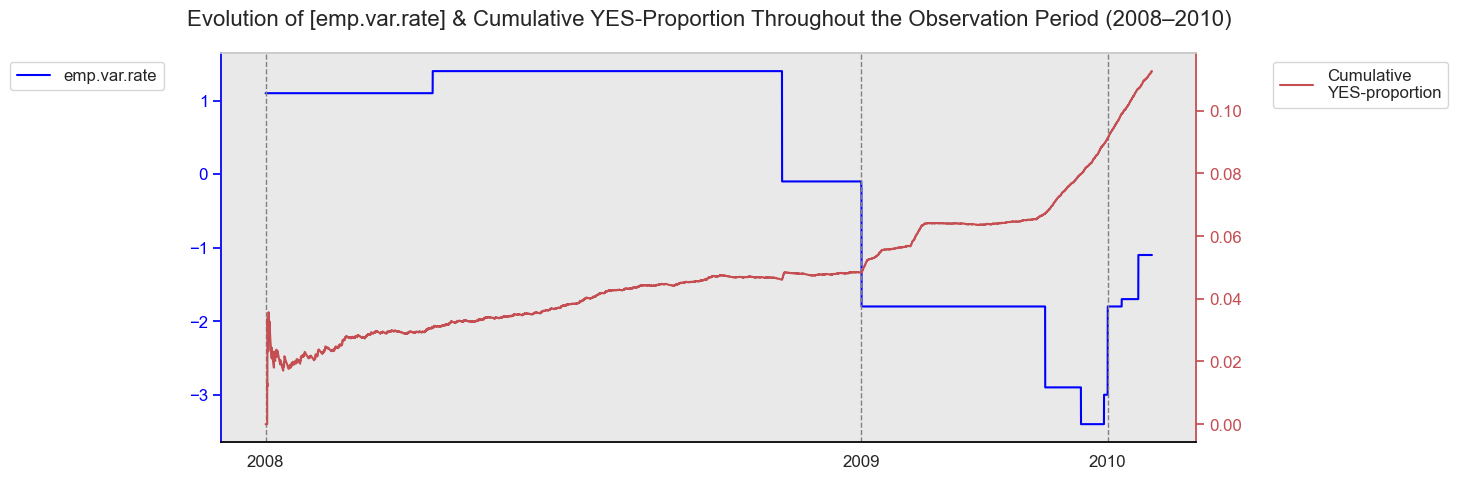

In [63]:
feature_name = 'emp.var.rate'

# Cumulative YES-proportion
cumulative_yes_proportion = []
num = 0
den = 0

for i in range(df.shape[0]):
    num += df['y'][i]
    den += 1
    cumulative_yes_proportion.append(num / den)

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

sns.lineplot(data=df[feature_name], label=f'{feature_name}',
             color='blue', ax=ax1)
sns.lineplot(data=cumulative_yes_proportion, label=f'Cumulative\nYES-proportion',
             color='r', ax=ax2)

ax2.spines['left'].set_color('blue')
ax2.spines['right'].set_color('r')
ax2.spines['bottom'].set_color('black')

ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('r')

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='r')

ax1.legend(bbox_to_anchor=(-0.05, 1))
ax2.legend(bbox_to_anchor=(1.07, 1))

ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.grid(False)
ax2.grid(False)

# Marking years
year_indexes = [0, 27690, 39130]
year_labels = [2008, 2009, 2010]
for idx in year_indexes:
    ax1.axvline(x=idx, lw=1, ls='--', c='grey')
ax1.set_xticks(ticks=year_indexes, labels=year_labels)
ax1.set_facecolor('lightgrey') 
ax1.set_facecolor((0.83, 0.83, 0.83, 0.5))  

plt.title(f'Evolution of [{feature_name}] & Cumulative YES-Proportion Throughout the Observation Period (2008–2010)', fontsize=16, pad=20)
plt.tight_layout()

In [64]:
feature_name = 'emp.var.rate'
print(f'Pearson corr. coef. ({feature_name} vs y): {df[feature_name].corr(df["y"]):.4f}')

Pearson corr. coef. (emp.var.rate vs y): -0.2983


- Thông thường, khi tỷ lệ thay đổi việc làm (emp.var.rate) dương và ổn định, người dân sẽ có xu hướng yên tâm hơn và sẵn sàng gửi tiền tiết kiệm dài hạn. Tuy nhiên, biểu đồ lại cho thấy điều ngược lại, cho thấy cần xem xét thêm bối cảnh thực tế lúc đó.

- 2008: Tuy emp.var.rate dương, giữ ở mức ổn định trên biểu đồ, nhưng khủng hoảng tài chính toàn câu 2008 bắt đầu khiến nguời dân lo ngại về sự bất ổn kinh tế toàn cầu (ngân hàng phá sản, thị trường chứng khoán sụp đổ, bong bóng nhà ở, ...) dẫn đến tâm lý phòng thủ cực kỳ mạnh, không dám gửi tiền kỳ hạn.

- Cuối 2009 – đầu 2010: Sau 1 năm chịu đựng khủng hoảng, tỷ lệ biến động việc làm vẫn còn cao nhưng tình hình đã ghi nhận sự phục hồi nhẹ. Điều này dẫn tới việc người dân bắt đầu tìm kiếm kênh an toàn cho tài sản → gửi tiết kiệm kỳ hạn nhiều hơn thay vì để tiền mặt hoặc đầu tư rủi ro (như chứng khoán, bất động sản, ...)

As you see, it is a light negative correlation. That means, the higher employment variation rate - the lower YES-proportion we got, and vice versa. And that seems quite reasonable: if the employment rate is highly various, people are not sure about their future and tend to make cautious decisions - so they give YES-answer less frequent. But we should be careful here and recall that correlation is not causation.

Text(0.5, 1.0, 'emp.var.rate vs. y')

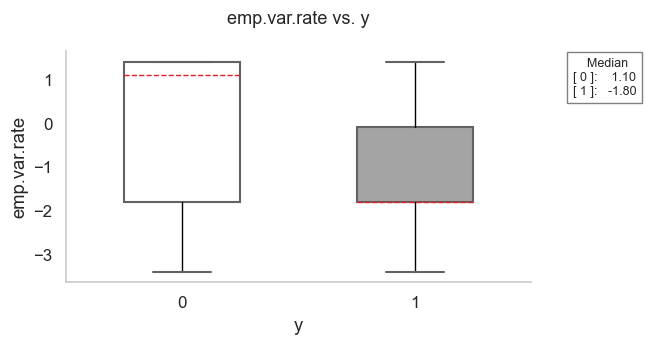

In [65]:
feature_name = 'emp.var.rate'

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x=df['y'], y=df[feature_name],
            width=0.5,
            palette={0: 'white', 1: '#a4a4a4'},
            medianprops={'linestyle':'--', 'linewidth':1, 'color':'#e41c29'},
            whiskerprops={'color':'black', 'linewidth':1},
            ax=ax)

bbox_props = dict(fc='w', ec='0.5', alpha=1)
median_no, median_yes = df.groupby('y')[feature_name].median()
plt.text(1.68, 1.04, f'    Median\n[ 0 ]:{median_no:>8.2f}\n[ 1 ]:  {median_yes:>6.2f}', 
         ha='left', va='center', size=9,
         bbox=bbox_props)

sns.despine(top=True, right=True)
ax.grid(False)
plt.title(f'{feature_name} vs. y', fontsize=13, pad=20)

Obviously, there is a huge difference between medians, and that's why this feature will be really useful for classification.

In [66]:
feature_name = 'emp.var.rate'

var_by_year = pd.concat([df.groupby('year')[feature_name].var(), 
                         np.round(df['year'].value_counts(normalize=True) * 100, 1)], axis=1)

var_by_year.columns = [f'Variation of `{feature_name}`', 'Number of observations (%)']
var_by_year

,Variation of `emp.var.rate`,Number of observations (%)
year,,
2008,0.244666,67.2
2009,0.329827,27.8
2010,0.090704,5.0


<u>_Conclusion:_</u>  
- There is a light negative correlation (~ -0.3) between emp.var.rate and the proportion of YES answers.
- There’s a large difference in medians between YES and NO groups.
- Most data was collected during an economically difficult period (2008–2009).
- `emp.var.rate` has 10 unique values, ranging from -3.4 to 1.4.

Feature 17: cons.price.idx (numerical)

`cons.price.idx`: consumer price index - monthly indicator (numeric)

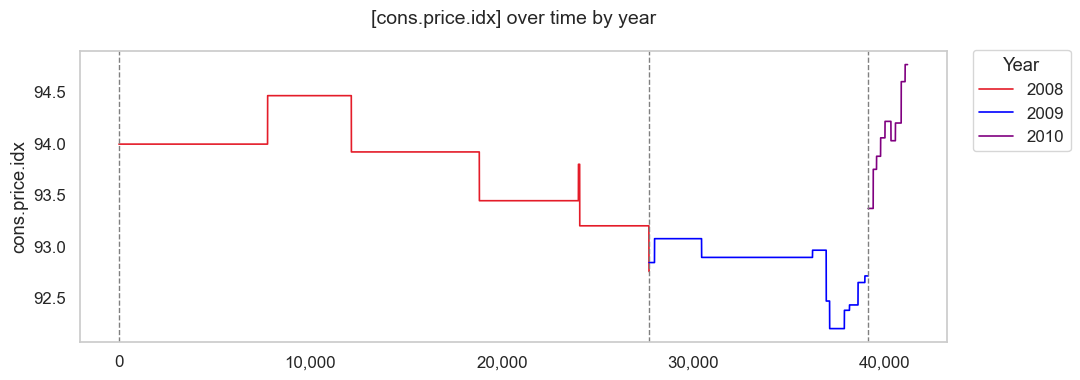

In [67]:
feature_name = 'cons.price.idx'

sns.set(style='whitegrid', font_scale=1.1)
fig, ax = plt.subplots(figsize=(11, 4))

colors = {2008: '#e41c29', 2009: 'blue', 2010: 'purple'}

for year in df['year'].unique():
    df_year = df[df['year'] == year]
    ax.plot(df_year.index, df_year[feature_name], label=str(year), color=colors[year], linewidth=1.2)

year_ticks = df.groupby('year').apply(lambda x: x.index[0]).values
for idx in year_ticks:
    ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)

ax.set_title(f"[{feature_name}] over time by year", fontsize=14, pad=20)
ax.set_ylabel(feature_name)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.legend(title='Year', bbox_to_anchor=(1.02, 1.035), loc='upper left', frameon=True)
ax.grid(False)

# sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

- 2008 and 2009: index was gradually decreasing with some short periods of growth. And at the end of 2009 it started to grow.
- 2010: prices went up dramatically.

In [68]:
feature_name = 'cons.price.idx'

print(f'Number of unique values: {df[feature_name].nunique()}\n')
print(f'Vary from {df[feature_name].min()} to {df[feature_name].max()}')

Number of unique values: 26

Vary from 92.201 to 94.767


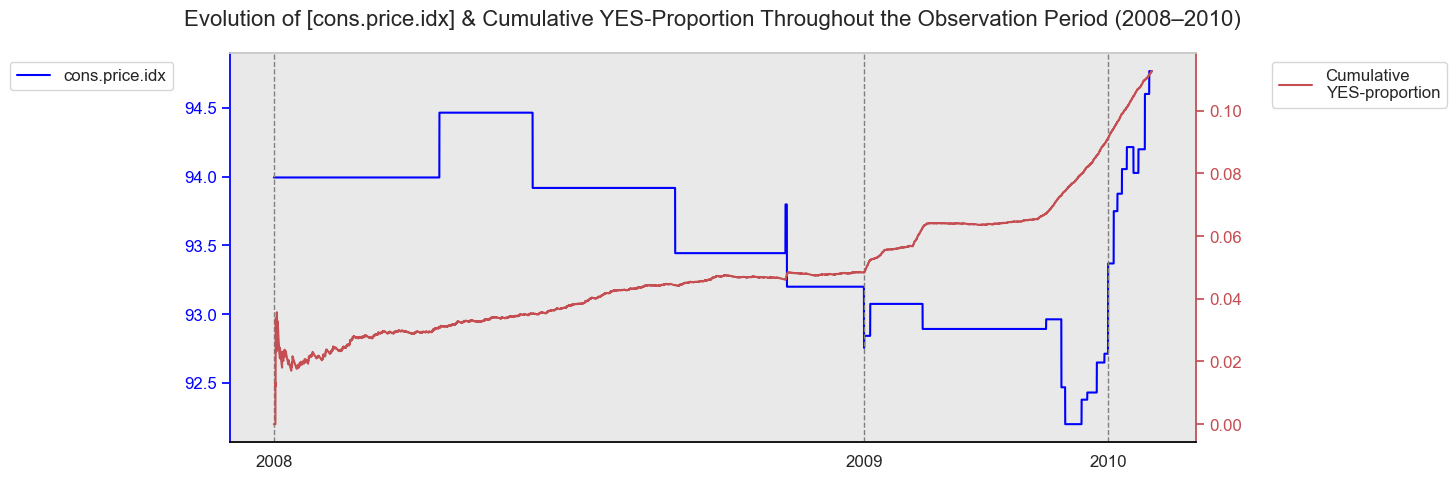

In [69]:
feature_name = 'cons.price.idx'

# Cumulative yes-proportion
cumulative_yes_proportion = []
num = 0
den = 0

for i in range(df.shape[0]):
    num += df['y'][i]
    den += 1
    cumulative_yes_proportion.append(num / den)

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

sns.lineplot(data=df[feature_name], label=f'{feature_name}',
             color='blue', ax=ax1)
sns.lineplot(data=cumulative_yes_proportion, label=f'Cumulative\nYES-proportion',
             color='r', ax=ax2)

ax2.spines['left'].set_color('blue')
ax2.spines['right'].set_color('r')
ax2.spines['bottom'].set_color('black')

ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('r')

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='r')

ax1.legend(bbox_to_anchor=(-0.05, 1))
ax2.legend(bbox_to_anchor=(1.07, 1))

ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.grid(False)
ax2.grid(False)

# Marking years
year_indexes = [0, 27690, 39130]
year_labels = [2008, 2009, 2010]
for idx in year_indexes:
    ax1.axvline(x=idx, lw=1, ls='--', c='grey')
ax1.set_xticks(ticks=year_indexes, labels=year_labels)
ax1.set_facecolor('lightgrey') 
ax1.set_facecolor((0.83, 0.83, 0.83, 0.5))  

plt.title(f'Evolution of [{feature_name}] & Cumulative YES-Proportion Throughout the Observation Period (2008–2010)', fontsize=16, pad=20)
plt.tight_layout();

In [70]:
eature_name = 'cons.price.idx'
print(f'Pearson corr. coef. ({feature_name} vs y): {df[feature_name].corr(df["y"]):.4f}')

Pearson corr. coef. (cons.price.idx vs y): -0.1362


There is a little negative correlation between cons.price.idx and y.

Text(0.5, 1.0, 'cons.price.idx vs. y')

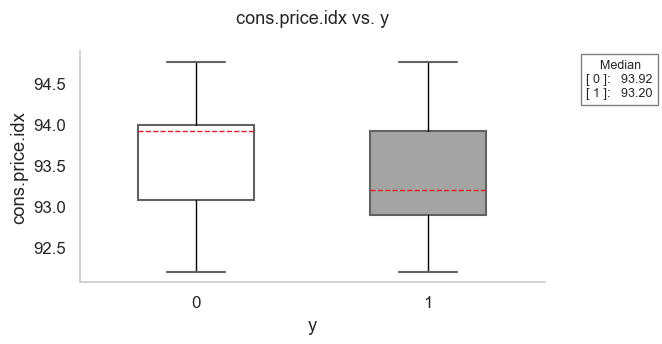

In [71]:
feature_name = 'cons.price.idx'

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x=df['y'], y=df[feature_name],
            width=0.5,
            palette={0: 'white', 1: '#a4a4a4'},
            medianprops={'linestyle':'--', 'linewidth':1, 'color':'#e41c29'},
            whiskerprops={'color':'black', 'linewidth':1},
            ax=ax)

bbox_props = dict(fc='w', ec='0.5', alpha=1)
median_no, median_yes = df.groupby('y')[feature_name].median()
plt.text(1.68, 94.55, f'    Median\n[ 0 ]:{median_no:>8.2f}\n[ 1 ]:  {median_yes:>6.2f}', 
         ha='left', va='center', size=9,
         bbox=bbox_props)

sns.despine(top=True, right=True)
ax.grid(False)
plt.title(f'{feature_name} vs. y', fontsize=13, pad=20)

Again, there is a huge difference between medians, and that's good for classification tasks.

In [72]:
feature_name = 'cons.price.idx'

var_by_year = pd.concat([df.groupby('year')[feature_name].var(), 
                         np.round(df['year'].value_counts(normalize=True) * 100, 1)], axis=1)

var_by_year.columns = [f'Variation of `{feature_name}`', 'Number of observations (%)']
var_by_year

,Variation of `cons.price.idx`,Number of observations (%)
year,,
2008,0.153046,67.2
2009,0.056738,27.8
2010,0.139676,5.0


2008 and 2010 were more stormy than 2009.

Feture 18: cons.conf.idx (numerical)

`cons.conf.idx`: consumer confidence index - monthly indicator (numeric)

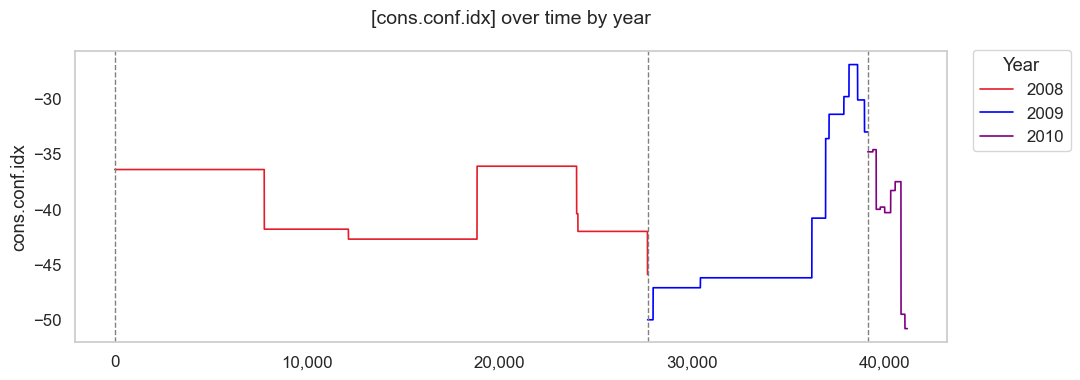

In [73]:
feature_name = 'cons.conf.idx'

sns.set(style='whitegrid', font_scale=1.1)
fig, ax = plt.subplots(figsize=(11, 4))

colors = {2008: '#e41c29', 2009: 'blue', 2010: 'purple'}

for year in df['year'].unique():
    df_year = df[df['year'] == year]
    ax.plot(df_year.index, df_year[feature_name], label=str(year), color=colors[year], linewidth=1.2)

year_ticks = df.groupby('year').apply(lambda x: x.index[0]).values
for idx in year_ticks:
    ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)

ax.set_title(f"[{feature_name}] over time by year", fontsize=14, pad=20)
ax.set_ylabel(feature_name)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.legend(title='Year', bbox_to_anchor=(1.02, 1.035), loc='upper left', frameon=True)
ax.grid(False)

# sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

- 2008: a consumer confidence varied a lot and was decreasing at the end of the year.
- 2009: an index was increasing and became pretty high before the drop at the end.
- 2010: a consumer confidence went down fast and that fully correlate with a consumer price index for that time.

In [74]:
feature_name = 'cons.conf.idx'

print(f'Number of unique values: {df[feature_name].nunique()}\n')
print(f'Vary from {df[feature_name].min()} to {df[feature_name].max()}')

Number of unique values: 26

Vary from -50.8 to -26.9


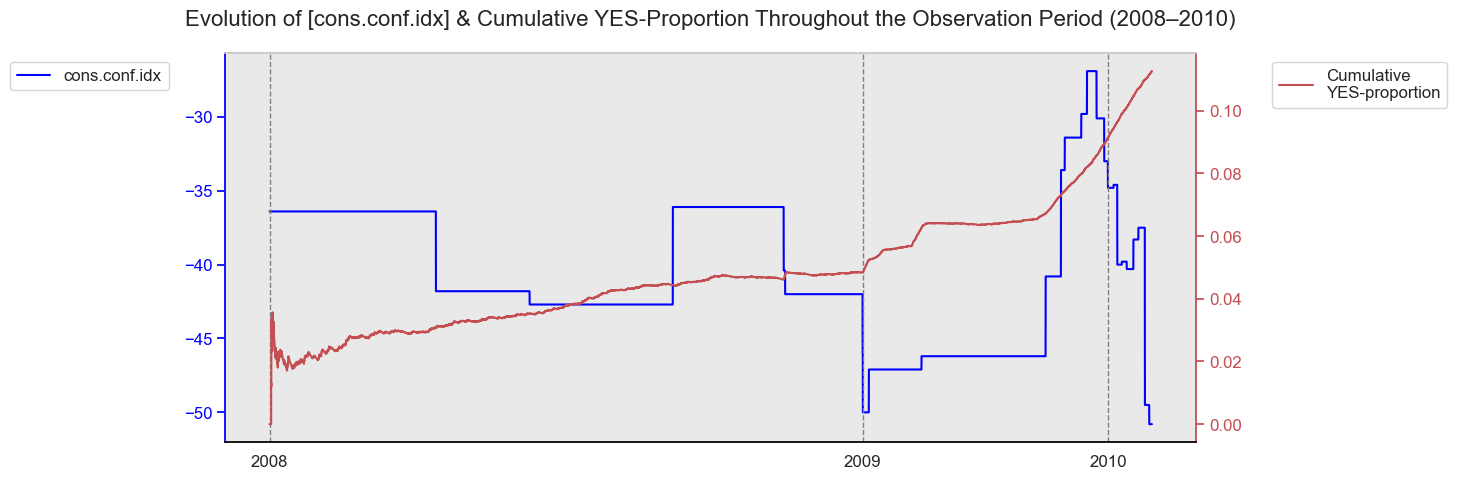

In [75]:
feature_name = 'cons.conf.idx'

# Cumulative yes-proportion
cumulative_yes_proportion = []
num = 0
den = 0

for i in range(df.shape[0]):
    num += df['y'][i]
    den += 1
    cumulative_yes_proportion.append(num / den)

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

sns.lineplot(data=df[feature_name], label=f'{feature_name}',
             color='blue', ax=ax1)
sns.lineplot(data=cumulative_yes_proportion, label=f'Cumulative\nYES-proportion',
             color='r', ax=ax2)

ax2.spines['left'].set_color('blue')
ax2.spines['right'].set_color('r')
ax2.spines['bottom'].set_color('black')

ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('r')

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='r')

ax1.legend(bbox_to_anchor=(-0.05, 1))
ax2.legend(bbox_to_anchor=(1.07, 1))

ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.grid(False)
ax2.grid(False)


# Marking years
year_indexes = [0, 27690, 39130]
year_labels = [2008, 2009, 2010]
for idx in year_indexes:
    ax1.axvline(x=idx, lw=1, ls='--', c='grey')
ax1.set_xticks(ticks=year_indexes, labels=year_labels)
ax1.set_facecolor('lightgrey') 
ax1.set_facecolor((0.83, 0.83, 0.83, 0.5))  

plt.title(f'Evolution of [{feature_name}] & Cumulative YES-Proportion Throughout the Observation Period (2008–2010)', fontsize=16, pad=20)
plt.tight_layout();

In [76]:
feature_name = 'cons.conf.idx'
print(f'Pearson corr. coef. ({feature_name} vs y): {df[feature_name].corr(df["y"]):.4f}')

Pearson corr. coef. (cons.conf.idx vs y): 0.0549


There is no significant correlation between cons.conf.idx and y.

Text(0.5, 1.0, 'cons.conf.idx vs. y')

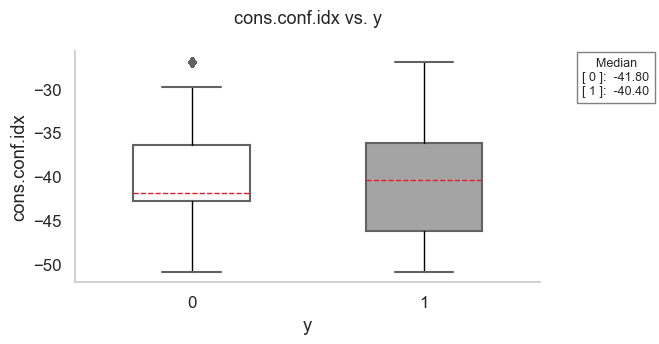

In [77]:
feature_name = 'cons.conf.idx'

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x=df['y'], y=df[feature_name],
            width=0.5,
            palette={0: 'white', 1: '#a4a4a4'},
            medianprops={'linestyle':'--', 'linewidth':1, 'color':'#e41c29'},
            whiskerprops={'color':'black', 'linewidth':1},
            ax=ax)

bbox_props = dict(fc='w', ec='0.5', alpha=1)
median_no, median_yes = df.groupby('y')[feature_name].median()
plt.text(1.68, -28.7, f'    Median\n[ 0 ]:{median_no:>8.2f}\n[ 1 ]:  {median_yes:>6.2f}', 
         ha='left', va='center', size=9,
         bbox=bbox_props)

sns.despine(top=True, right=True)
ax.grid(False)
plt.title(f'{feature_name} vs. y', fontsize=13, pad=20)

Now, let's check a variance by year:

In [78]:
feature_name = 'cons.conf.idx'

var_by_year = pd.concat([df.groupby('year')[feature_name].var(), 
                         np.round(df['year'].value_counts(normalize=True) * 100, 1)], axis=1)

var_by_year.columns = [f'Variation of `{feature_name}`', 'Number of observations (%)']
var_by_year

,Variation of `cons.conf.idx`,Number of observations (%)
year,,
2008,8.994287,67.2
2009,41.620872,27.8
2010,23.409292,5.0


> The Consumer Confidence Index (CCI) is a survey, administered by The Conference Board, that measures how optimistic or pessimistic consumers are regarding their expected financial situation. The CCI is based on the premise that if consumers are optimistic, they will spend more and stimulate the economy but if they are pessimistic then their spending patterns could lead to a recession.



Feature 19: euribor3m (numerical)

`euribor3m`:  euribor 3 month rate - daily indicator (numeric)
> Euribor - The Euro Interbank Offered Rate is a daily reference rate, published by the European Money Markets Institute, based on the averaged interest rates at which Eurozone banks offer to lend unsecured funds to other banks in the euro wholesale money market. Prior to 2015, the rate was published by the European Banking Federation.

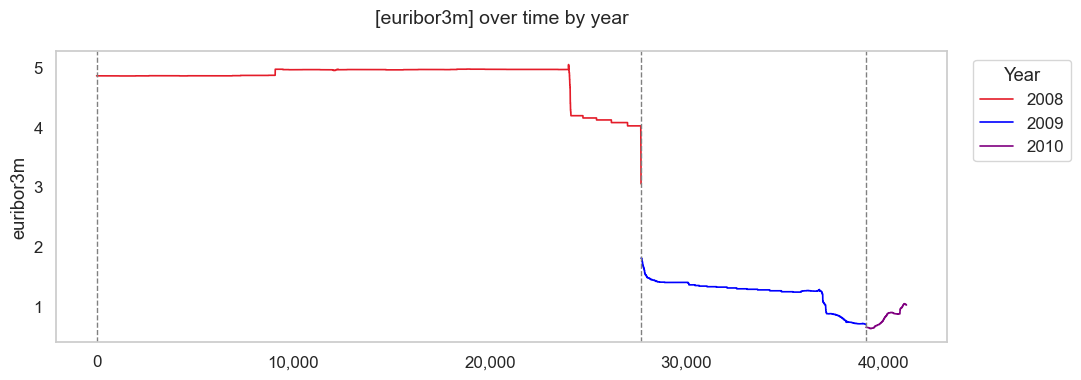

In [79]:
feature_name = 'euribor3m'

sns.set(style='whitegrid', font_scale=1.1)
fig, ax = plt.subplots(figsize=(11, 4))

colors = {2008: '#e41c29', 2009: 'blue', 2010: 'purple'}

for year in df['year'].unique():
    df_year = df[df['year'] == year]
    ax.plot(df_year.index, df_year[feature_name], label=str(year), color=colors[year], linewidth=1.2)

year_ticks = df.groupby('year').apply(lambda x: x.index[0]).values
for idx in year_ticks:
    ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)

ax.set_title(f"[{feature_name}] over time by year", fontsize=14, pad=20)
ax.set_ylabel(feature_name)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.legend(title='Year', bbox_to_anchor=(1.02, 1.0), loc='upper left', frameon=True)
ax.grid(False)

# sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

- 2008: during that year euribor3m was stable and dropped at the end.
- 2009: euribor3m continued to gradually decrease, but much slowly than in the last months of 2008, and there was another drop at the end of the year.
- 2010: euribor3m was growing.

In [80]:
feature_name = 'euribor3m'

print(f'Number of unique values: {df[feature_name].nunique()}\n')
print(f'Vary from {df[feature_name].min()} to {df[feature_name].max()}')

Number of unique values: 316

Vary from 0.634 to 5.045


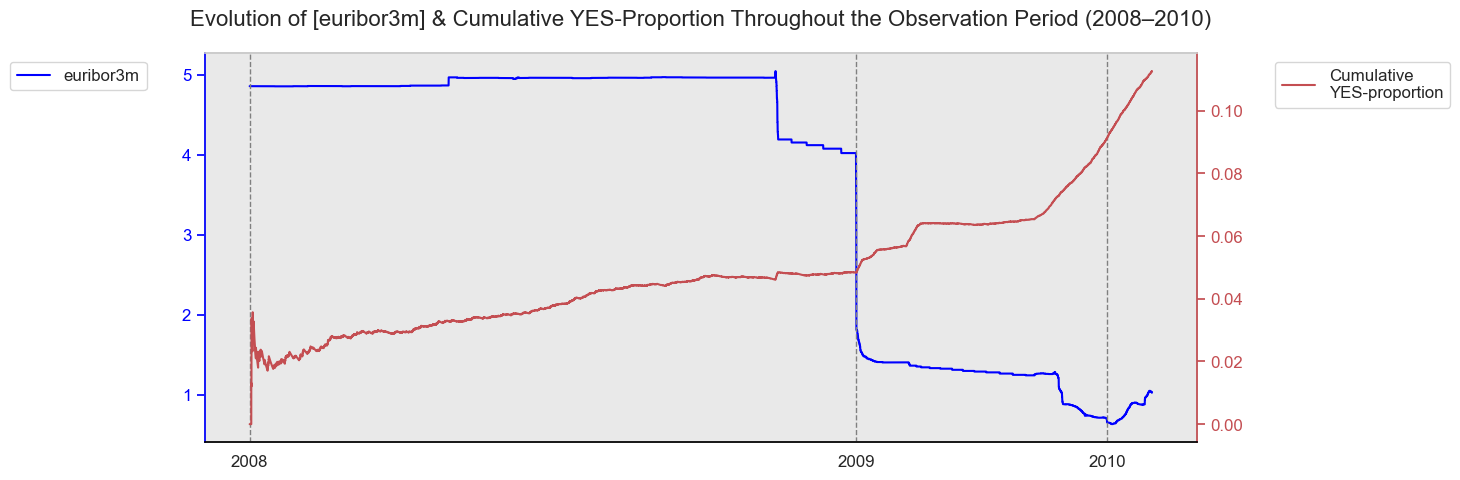

In [81]:
feature_name = 'euribor3m'

# Cumulative yes-proportion
cumulative_yes_proportion = []
num = 0
den = 0

for i in range(df.shape[0]):
    num += df['y'][i]
    den += 1
    cumulative_yes_proportion.append(num / den)

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

sns.lineplot(data=df[feature_name], label=f'{feature_name}',
             color='blue', ax=ax1)
sns.lineplot(data=cumulative_yes_proportion, label=f'Cumulative\nYES-proportion',
             color='r', ax=ax2);

ax2.spines['left'].set_color('blue')
ax2.spines['right'].set_color('r')
ax2.spines['bottom'].set_color('black')

ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('r')

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='r')

ax1.legend(bbox_to_anchor=(-0.05, 1))
ax2.legend(bbox_to_anchor=(1.07, 1))

ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.grid(False)
ax2.grid(False)


# Marking years
year_indexes = [0, 27690, 39130]
year_labels = [2008, 2009, 2010]
for idx in year_indexes:
    ax1.axvline(x=idx, lw=1, ls='--', c='grey')
ax1.set_xticks(ticks=year_indexes, labels=year_labels)
ax1.set_facecolor('lightgrey') 
ax1.set_facecolor((0.83, 0.83, 0.83, 0.5))  

plt.title(f'Evolution of [{feature_name}] & Cumulative YES-Proportion Throughout the Observation Period (2008–2010)', fontsize=16, pad=20)
plt.tight_layout()

In [82]:
feature_name = 'euribor3m'
print(f'Pearson corr. coef. ({feature_name} vs y): {df[feature_name].corr(df["y"]):.4f}')

Pearson corr. coef. (euribor3m vs y): -0.3078


There is a weak negative correlation between `euribor3m` and `y`.

Text(0.5, 1.0, 'euribor3m vs. y')

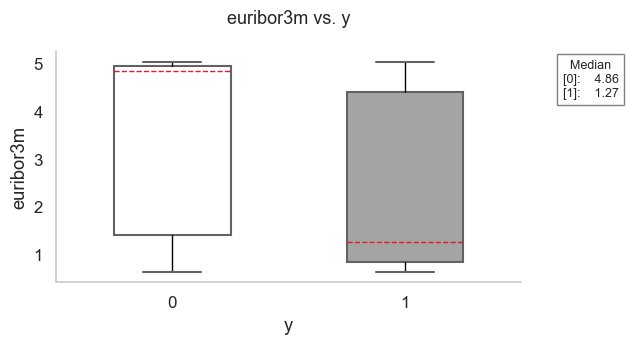

In [83]:
feature_name = 'euribor3m'

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x=df['y'], y=df[feature_name],
            width=0.5,
            palette={0: 'white', 1: '#a4a4a4'},
            medianprops={'linestyle':'--', 'linewidth':1, 'color':'#e41c29'},
            whiskerprops={'color':'black', 'linewidth':1},
            ax=ax)

bbox_props = dict(fc='w', ec='0.5', alpha=1)
median_no, median_yes = df.groupby('y')[feature_name].median()
plt.text(1.68, 4.669, f'  Median\n[0]:{median_no:>8.2f}\n[1]:  {median_yes:>6.2f}', 
         ha='left', va='center', size=9,
         bbox=bbox_props)

sns.despine(top=True, right=True)
ax.grid(False)
plt.title(f'{feature_name} vs. y', fontsize=13, pad=20)

There is a huge difference between medians, so this feature will be useful for classification.

In [84]:
feature_name = 'euribor3m'

var_by_year = pd.concat([df.groupby('year')[feature_name].var(), 
                         np.round(df['year'].value_counts(normalize=True) * 100, 1)], axis=1)

var_by_year.columns = [f'Variation of `{feature_name}`', 'Number of observations (%)']
var_by_year

,Variation of `euribor3m`,Number of observations (%)
year,,
2008,0.077798,67.2
2009,0.050621,27.8
2010,0.016944,5.0


Feature 20: nr.employed (numerical)

`nr.employed`: number of employees - quarterly indicator (numeric)

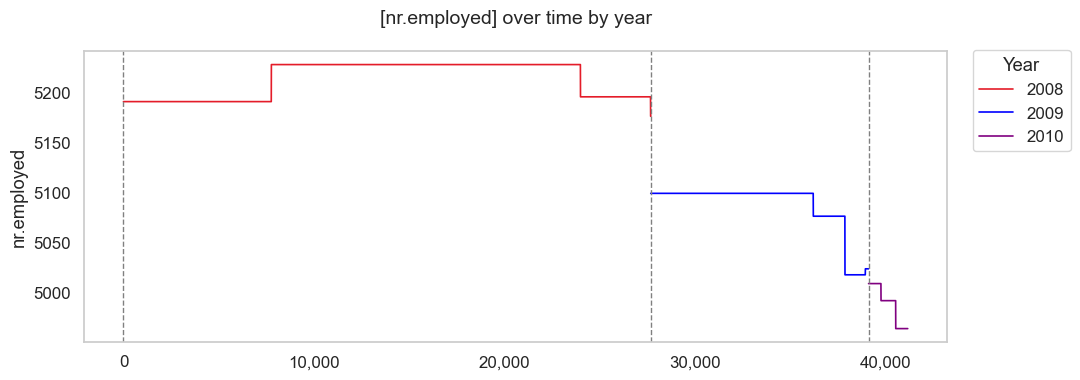

In [85]:
feature_name = 'nr.employed'

sns.set(style='whitegrid', font_scale=1.1)
fig, ax = plt.subplots(figsize=(11, 4))

colors = {2008: '#e41c29', 2009: 'blue', 2010: 'purple'}

for year in df['year'].unique():
    df_year = df[df['year'] == year]
    ax.plot(df_year.index, df_year[feature_name], label=str(year), color=colors[year], linewidth=1.2)

year_ticks = df.groupby('year').apply(lambda x: x.index[0]).values
for idx in year_ticks:
    ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)

ax.set_title(f"[{feature_name}] over time by year", fontsize=14, pad=20)
ax.set_ylabel(feature_name)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.legend(title='Year', bbox_to_anchor=(1.02, 1.035), loc='upper left', frameon=True)
ax.grid(False)

# sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

In [86]:
feature_name = 'nr.employed'

print(f'Number of unique values: {df[feature_name].nunique()}\n')
print(f'Vary from {df[feature_name].min()} to {df[feature_name].max()}')

Number of unique values: 11

Vary from 4963.6 to 5228.1


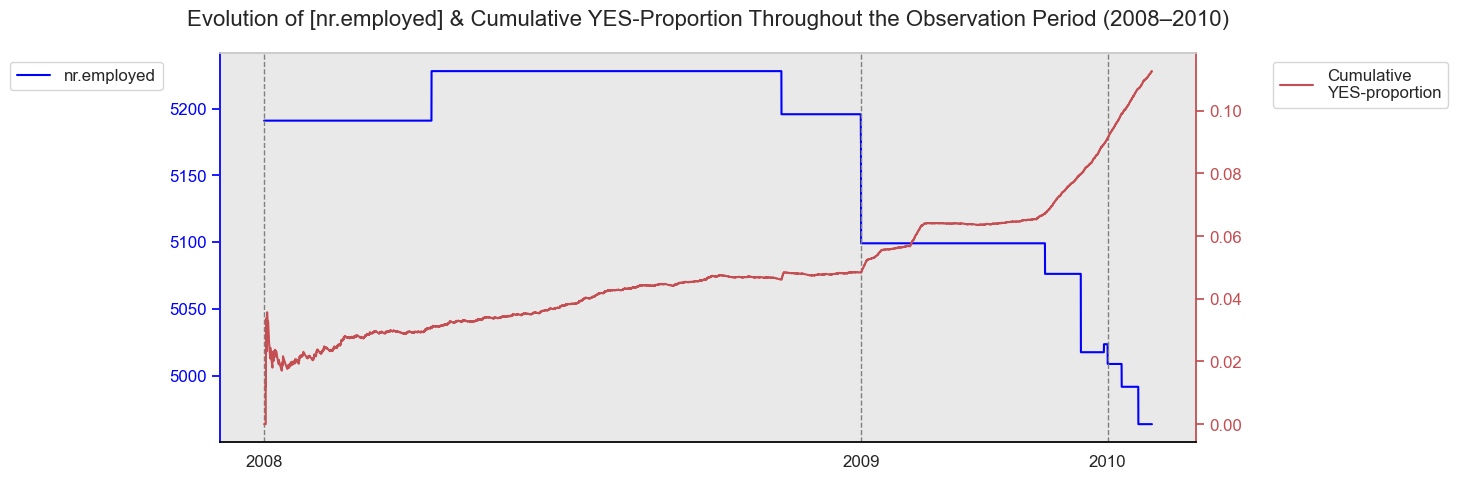

In [87]:
feature_name = 'nr.employed'

# Cumulative yes-proportion
cumulative_yes_proportion = []
num = 0
den = 0

for i in range(df.shape[0]):
    num += df['y'][i]
    den += 1
    cumulative_yes_proportion.append(num / den)

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

sns.lineplot(data=df[feature_name], label=f'{feature_name}',
             color='blue', ax=ax1)
sns.lineplot(data=cumulative_yes_proportion, label=f'Cumulative\nYES-proportion',
             color='r', ax=ax2);

ax2.spines['left'].set_color('blue')
ax2.spines['right'].set_color('r')
ax2.spines['bottom'].set_color('black')

ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('r')

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='r')

ax1.legend(bbox_to_anchor=(-0.05, 1))
ax2.legend(bbox_to_anchor=(1.07, 1))

ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.grid(False)
ax2.grid(False)

# Marking years
year_indexes = [0, 27690, 39130]
year_labels = [2008, 2009, 2010]
for idx in year_indexes:
    ax1.axvline(x=idx, lw=1, ls='--', c='grey')
ax1.set_xticks(ticks=year_indexes, labels=year_labels)
ax1.set_facecolor('lightgrey') 
ax1.set_facecolor((0.83, 0.83, 0.83, 0.5))  

plt.title(f'Evolution of [{feature_name}] & Cumulative YES-Proportion Throughout the Observation Period (2008–2010)', fontsize=16, pad=20)
plt.tight_layout();

In [88]:
feature_name = 'nr.employed'
print(f'Pearson corr. coef. ({feature_name} vs y): {df[feature_name].corr(df["y"]):.4f}')

Pearson corr. coef. (nr.employed vs y): -0.3547


There is negative correlation between nr.employed and y.

Text(0.5, 1.0, 'nr.employed vs. y')

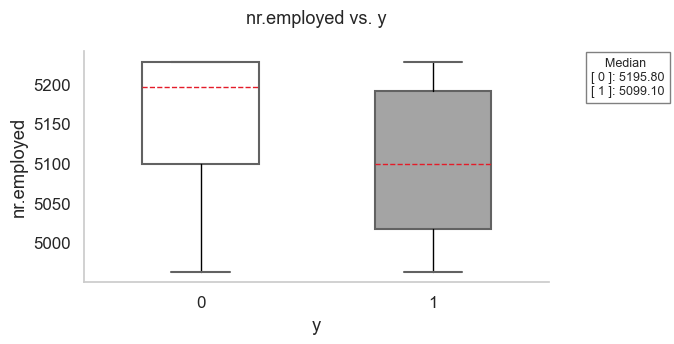

In [89]:
feature_name = 'nr.employed'

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x=df['y'], y=df[feature_name],
            width=0.5,
            palette={0: 'white', 1: '#a4a4a4'},
            medianprops={'linestyle':'--', 'linewidth':1, 'color':'#e41c29'},
            whiskerprops={'color':'black', 'linewidth':1},
            ax=ax)

bbox_props = dict(fc='w', ec='0.5', alpha=1)
median_no, median_yes = df.groupby('y')[feature_name].median()
plt.text(1.68, 5208, f'    Median\n[ 0 ]:{median_no:>8.2f}\n[ 1 ]: {median_yes:>6.2f}', 
         ha='left', va='center', size=9,
         bbox=bbox_props)

sns.despine(top=True, right=True)
ax.grid(False)
plt.title(f'{feature_name} vs. y', fontsize=13, pad=20)

In [90]:
feature_name = 'nr.employed'

var_by_year = pd.concat([df.groupby('year')[feature_name].var(), 
                         np.round(df['year'].value_counts(normalize=True) * 100, 1)], axis=1)

var_by_year.columns = [f'Variation of `{feature_name}`', 'Number of observations (%)']
var_by_year

,Variation of `nr.employed`,Number of observations (%)
year,,
2008,309.067537,67.2
2009,639.057587,27.8
2010,323.928710,5.0


Feature 21: output variable (target - binary)

`y`: has the client subscribed a term deposit? (binary: 'yes','no')

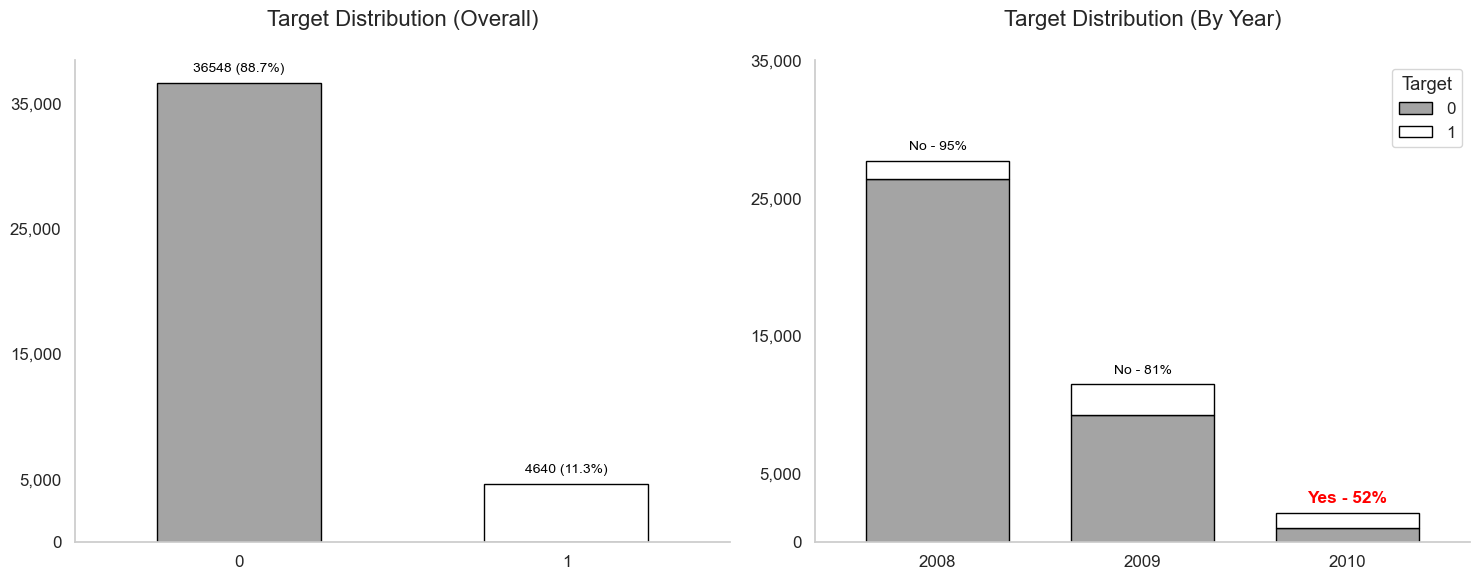

In [91]:
import matplotlib.ticker as mtick

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#Plot 1: Overall distribution
sns.countplot(x='y', 
              data=df, 
              palette={0: '#a4a4a4', 1: 'white'}, 
              ax=axes[0],
              edgecolor='black',
              width=0.5)

abs_vals = df['y'].value_counts()
rel_vals = df['y'].value_counts(normalize=True) * 100
labels = [f'{val} ({pct:.1f}%)' for val, pct in zip(abs_vals, rel_vals)]
axes[0].bar_label(axes[0].containers[0], labels=labels, fontsize=10, padding=6, color='black')
axes[0].set_title('Target Distribution (Overall)', fontsize=16, pad=25)
axes[0].set_xlabel('')
axes[0].set_ylabel('', fontsize=12)
axes[0].grid(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_yticks([0, 5000, 15000, 25000, 35000])
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

#Plot 2: Distribution by year 
df_grouped = df.groupby(['year', 'y']).size().unstack(fill_value=0)
df_grouped.plot(kind='bar', stacked=True, color=['#a4a4a4', 'white'], ax=axes[1], edgecolor='black', width=0.7)

for i, year in enumerate(df_grouped.index):
    total = df_grouped.loc[year].sum()
    no_pct = df_grouped.loc[year, 0] / total * 100
    yes_pct = df_grouped.loc[year, 1] / total * 100

    if year == 2010:
        label = f"Yes - {yes_pct:.0f}%"
        axes[1].text(x=i, y=total + 600, s=label, ha='center', va='bottom', fontsize=12.5, color='red', fontweight='bold')
    else:
        label = f"No - {no_pct:.0f}%"
        axes[1].text(x=i, y=total + 600, s=label, ha='center', va='bottom', fontsize=10, color='black')

axes[1].set_title('Target Distribution (By Year)', fontsize=16, pad=25)
axes[1].set_xlabel('')
axes[1].set_ylabel('', fontsize=12)
axes[1].legend(title='Target', loc='upper right')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_yticks([0, 5000, 15000, 25000, 35000])
axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


In [94]:
# Tạo bảng phân phối theo năm
df_grouped = df.groupby(['year', 'y']).size().unstack(fill_value=0)
df_grouped.columns = ['no', 'yes']
df_grouped['total'] = df_grouped['no'] + df_grouped['yes']
df_grouped['yes_pct'] = df_grouped['yes'] / df_grouped['total'] * 100
df_grouped['no_pct'] = df_grouped['no'] / df_grouped['total'] * 100

df_grouped


,no,yes,total,yes_pct,no_pct
year,,,,,
2008,26351,1339,27690,4.835681,95.164319
2009,9212,2228,11440,19.475524,80.524476
2010,985,1073,2058,52.137998,47.862002


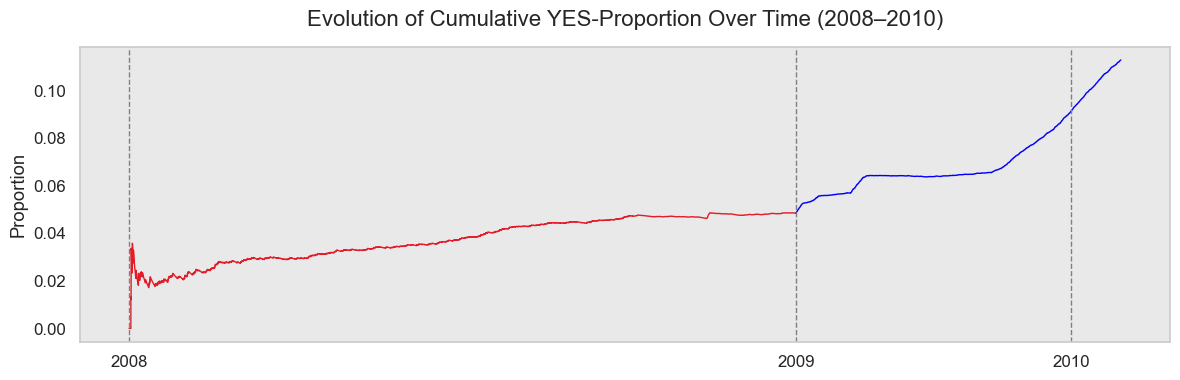

In [93]:
cumulative_yes_proportion = []
cumulative_no_proportion = []
yes = 0
denominator = 0

for i in range(df.shape[0]):
    yes += df['y'][i]
    denominator += 1
    cumulative_yes_proportion.append(yes / denominator)
    
cumulative_yes_proportion = pd.Series(cumulative_yes_proportion)

fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(data=cumulative_yes_proportion[:27690], label=f'2008-yes', lw=1, ax=ax, color='#e41c29')
sns.lineplot(data=cumulative_yes_proportion[27690:39130], label=f'2009-yes', lw=1, ax=ax, color='blue')
sns.lineplot(data=cumulative_yes_proportion[39130:], label=f'2010-yes', lw=1, ax=ax, color='blue')

ax.set_ylabel('Proportion')
ax.get_legend().remove()
ax.grid(False)

year_indexes = [0, 27690, 39130]
year_labels = [2008, 2009, 2010]
for idx in year_indexes:
    ax.axvline(x=idx, lw=1, ls='--', c='grey', linewidth=0.8)
ax.set_xticks(ticks=year_indexes, labels=year_labels)
ax.set_facecolor('lightgrey') 
ax.set_facecolor((0.83, 0.83, 0.83, 0.5))  

plt.title(f'Evolution of Cumulative YES-Proportion Over Time (2008–2010)', fontsize=16, pad=15)
plt.tight_layout()